## Load data  

The preprocessing steps for now are converting to lowercase, tokenizing, and stemming.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import time
import ast
from collections import Counter
from tqdm import tqdm
import json
import csv

path = '/content/drive/MyDrive/EY 2022-2023 Junior/Spring 2023/SOCSC-UH 2213 Textual Analysis/textual analysis final project/data/'

In [3]:
df = pd.read_csv(path+'main/master.csv',nrows=10)
df

,file_name,title,author,date,text,link,university,newspaper,country
0,artefactmagazine,What’s your vape habit costing the planet?,Stephen Menon,2023-02-02,Although the first disposable vape pens were r...,https://www.artefactmagazine.com/2023/02/02/wh...,"London College of Communication, University of...",The Artefact,uk
1,artefactmagazine,Bartending and Cocktail Cultures,Yanchao Gao,2023-02-01,Do you know the stories behind the bar you go ...,https://www.artefactmagazine.com/2023/02/01/ba...,"London College of Communication, University of...",The Artefact,uk
2,artefactmagazine,Rules and Radio,Raiessa Lin,2023-02-02,This mini podcast explores the many rules and ...,https://www.artefactmagazine.com/2023/02/02/ru...,"London College of Communication, University of...",The Artefact,uk
3,artefactmagazine,Müll: The refill and recycling hub in London,Carrington Saunders,2023-02-01,This creative package explores Müll in Brockle...,https://www.artefactmagazine.com/2023/02/01/mu...,"London College of Communication, University of...",The Artefact,uk
4,artefactmagazine,Concerns over delays to child surgery,Taysan Ali-Osman,2023-02-02,Surgery is an eerie subject no matter the circ...,https://www.artefactmagazine.com/2023/02/02/th...,"London College of Communication, University of...",The Artefact,uk
5,artefactmagazine,NHS Strike: On the Picket Line,Caighlyn Magee-Biggs,2023-02-02,Nurses in the UK are demanding change. Our fro...,https://www.artefactmagazine.com/2023/02/02/nh...,"London College of Communication, University of...",The Artefact,uk
6,artefactmagazine,Meet the rising stars of cabaret,Muna Hagle,2023-02-03,Stepping into the London Cabaret scene was lik...,https://www.artefactmagazine.com/2023/02/03/me...,"London College of Communication, University of...",The Artefact,uk
7,artefactmagazine,London’s next generation of female creatives,Clarabelle Tan,2023-02-02,Artefact casts a spotlight on four up-and-comi...,https://www.artefactmagazine.com/2023/02/02/lo...,"London College of Communication, University of...",The Artefact,uk
8,artefactmagazine,OnlyWork: Attitudes towards sex workers in the...,Stephen Menon,2023-02-02,"In this episode of the Artefact Podcast, we me...",https://www.artefactmagazine.com/2023/02/02/on...,"London College of Communication, University of...",The Artefact,uk
9,artefactmagazine,3D dreamlike spaces we would all love to visit,Izabela Kruczkiewicz,2023-03-24,3D design artists are taking it to another lev...,https://www.artefactmagazine.com/2023/03/24/3d...,"London College of Communication, University of...",The Artefact,uk


In [4]:
df['text'][0]

'Although the first disposable vape pens were released in 2004, it was not until early 2022 that they became ubiquitous. A wave of single use, brightly coloured, disposable vapes were suddenly available for half the price of a pack of cigarettes. Subsequently, they were distributed far and wide in corner shops and supermarkets alike. But what does this nascent form of nicotine absorption cost us? Although the price is generally cheap, the cost to the planet is far greater. With lithium batteries, a plastic exterior and unknown chemicals the effect they have could be catastrophic. Reporter Stephen Menon spoke to Joey Cooke, a disposable vape lover, and Laura Young, an environmental campaigner who’s leading the charge for disposable vapes to be banned in Scotland.    Featured image by Stephen Menon Your email address will not be published. Required fields are marked *  Name* Email* Website '

In [ ]:
uk = pd.read_csv(path+'ukmaster.csv')
uk

,file_name,title,author,date,text,link,university,newspaper
0,artefactmagazine,What’s your vape habit costing the planet?,Stephen Menon,2023-02-02,Although the first disposable vape pens were r...,https://www.artefactmagazine.com/2023/02/02/wh...,"London College of Communication, University of...",The Artefact
1,artefactmagazine,Bartending and Cocktail Cultures,Yanchao Gao,2023-02-01,Do you know the stories behind the bar you go ...,https://www.artefactmagazine.com/2023/02/01/ba...,"London College of Communication, University of...",The Artefact
2,artefactmagazine,Rules and Radio,Raiessa Lin,2023-02-02,This mini podcast explores the many rules and ...,https://www.artefactmagazine.com/2023/02/02/ru...,"London College of Communication, University of...",The Artefact
3,artefactmagazine,Müll: The refill and recycling hub in London,Carrington Saunders,2023-02-01,This creative package explores Müll in Brockle...,https://www.artefactmagazine.com/2023/02/01/mu...,"London College of Communication, University of...",The Artefact
4,artefactmagazine,Concerns over delays to child surgery,Taysan Ali-Osman,2023-02-02,Surgery is an eerie subject no matter the circ...,https://www.artefactmagazine.com/2023/02/02/th...,"London College of Communication, University of...",The Artefact
...,...,...,...,...,...,...,...,...
273296,yorkvision,\n\t\t\tHalloween how-to\t\t\t,York Vision,2009-10-28,As Halloween is approaching it’s time to start...,https://www.yorkvision.co.uk/archived/hallowee...,University of York,"York Vision (pronounced 'Fork Visor', rhymes ..."
273297,yorkvision,\n\t\t\tThe Ref-olution win their first battle...,Joseph McDermott,2009-10-28,Ref. Soc. President Andrew Case\nThe newly for...,https://www.yorkvision.co.uk/archived/the-ref-...,University of York,"York Vision (pronounced 'Fork Visor', rhymes ..."
273298,yorkvision,\n\t\t\tCraddock’s Classic: MK: Deadly Allianc...,York Vision,2009-10-15,"Today, the brawler genre has taken a serious b...",https://www.yorkvision.co.uk/archived/craddock...,University of York,"York Vision (pronounced 'Fork Visor', rhymes ..."
273299,yorkvision,\n\t\t\tA Brief History of Roses\t\t\t,Jim Norton,2009-04-27,There was a lot more at stake in the first inc...,https://www.yorkvision.co.uk/archived/a-brief-...,University of York,"York Vision (pronounced 'Fork Visor', rhymes ..."


In [ ]:
df = pd.read_csv(path+'master.csv')

In [ ]:
total_num_words = df['text'].apply(lambda x: len(x.split())).sum()
print(total_num_words)

490062277


In [ ]:
us = pd.read_csv(path+'us_preprocessed_tokens.csv', nrows=5)
us

,Unnamed: 0.1,Unnamed: 0,file_name,title,author,date,link,university,newspaper,stemmed_text,tokenized_text
0,0,0,thebuc,BARRY UNVEILS ELECTRIC CAR CHARGERS,By Anna Galaktionov,Feb 28,https://www.thebuc.org/post/barry-unveils-elec...,Barry University,The Buccaneer,feb 281 min readbarri unveil electr car charge...,"['feb', '281', 'min', 'readbarri', 'unveil', '..."
1,1,1,thebuc,STEEP 2023 OSCAR COMPETITION - WHO WILL TAKE H...,By Diana Morose,Feb 27,https://www.thebuc.org/post/steep-2023-oscar-c...,Barry University,The Buccaneer,feb 273 min readsteep 2023 oscar competit - wh...,"['feb', '273', 'min', 'readsteep', '2023', 'os..."
2,2,2,thebuc,NON-BINARY BATHROOMS AT BARRY,By Alyssa Diaz,Feb 28,https://www.thebuc.org/post/non-binary-bathroo...,Barry University,The Buccaneer,feb 283 min readnon-binari bathroom at barryup...,"['feb', '283', 'min', 'readnon-binari', 'bathr..."
3,3,3,thebuc,WHAT IT TAKES TO BE AN INFLUENCER,By Diana Morose,Feb 28,https://www.thebuc.org/post/what-it-takes-to-b...,Barry University,The Buccaneer,feb 283 min readwhat it take to be an influenc...,"['feb', '283', 'min', 'readwhat', 'it', 'take'..."
4,4,4,thebuc,HOW TO GET BEACH BODY READY FOR SUMMER,By Alyssa Diaz,Feb 27,https://www.thebuc.org/post/how-to-get-beach-b...,Barry University,The Buccaneer,feb 273 min readhow to get beach bodi readi fo...,"['feb', '273', 'min', 'readhow', 'to', 'get', ..."


### Descriptive Stat Plot #1: Average words per article by university

(1 university can have multiple newspapers)

In [ ]:
avg = df.groupby(['university','country'])['text'].apply(lambda x: len(' '.join(x).split()) / len(x)).reset_index()
avg

,university,country,text
0,Arkansas Tech University,us,400.921175
1,Austin Peay State University,us,514.263843
2,Bangor University,uk,527.646501
3,Barry University,us,645.530055
4,Bethel University,us,701.437158
...,...,...,...
82,Western Carolina University,us,550.112576
83,Western Kentucky University,us,465.698008
84,Wheaton College,us,565.923767
85,Whitman College,us,606.987661


In [ ]:
avg = avg.drop(35)

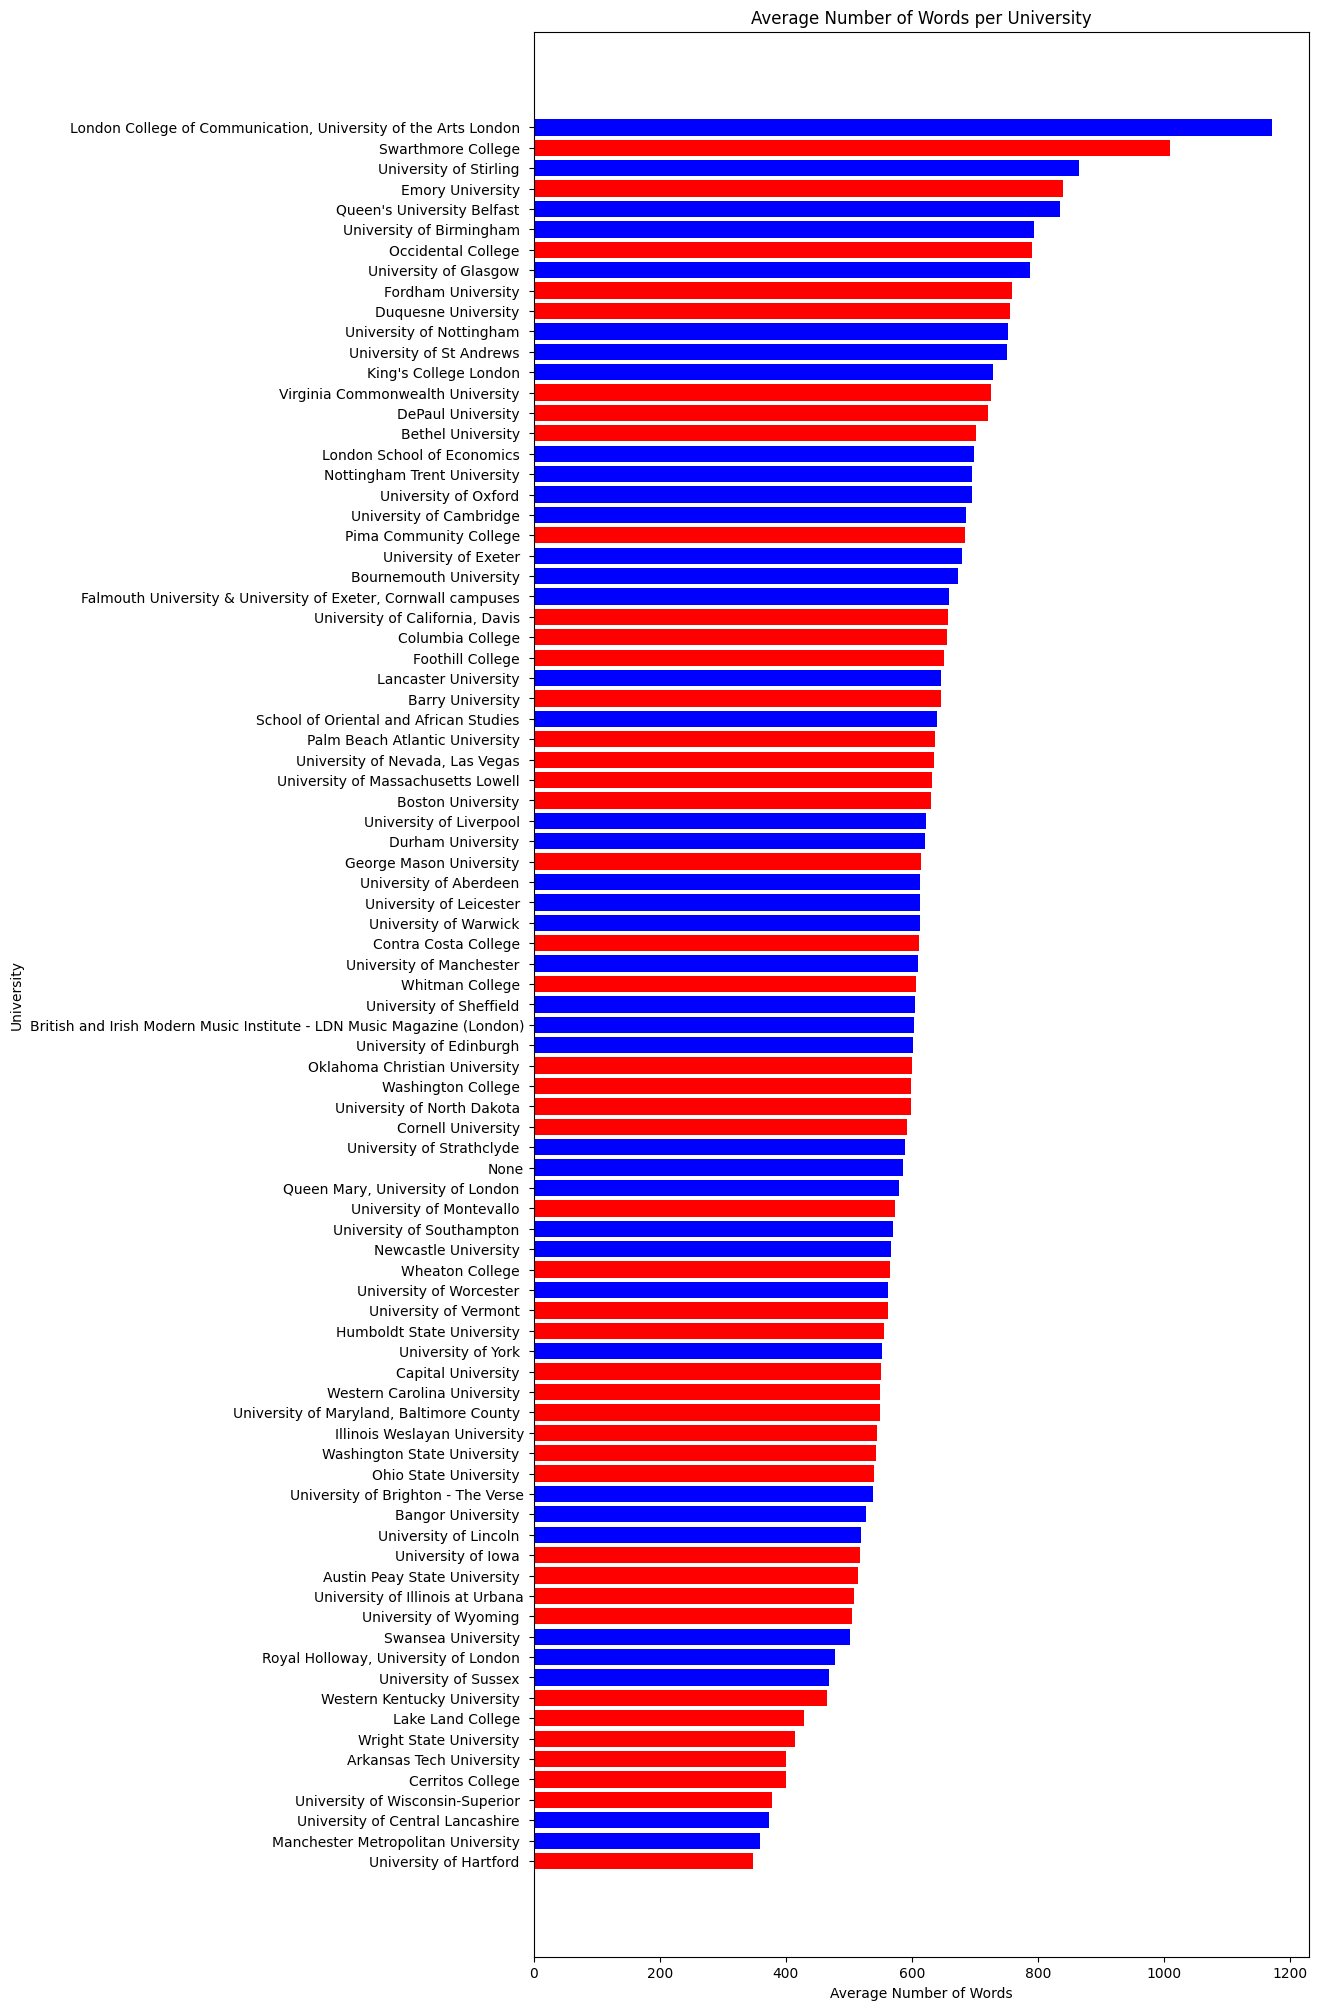

In [ ]:
import matplotlib.pyplot as plt
# Sort the DataFrame by the "avg_words" column
avg = avg.sort_values('text')

# Create a colormap that maps each country to a unique color
colormap = {'us': 'red', 'uk': 'blue'}
colors = [colormap[c] for c in avg['country']]

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 25))
ax.barh(avg['university'], avg['text'], color=colors)

# Add labels and title
ax.set_xlabel('Average Number of Words')
ax.set_ylabel('University')
ax.set_title('Average Number of Words per University')

# Show the plot
plt.show()

T-test to see if the average words per article is different between the US and the UK.

This suggests that there is not enough evidence to reject the null hypothesis that the two population means are equal, and that the observed difference in means could be due to chance.

In [ ]:
print(avg[avg['country'] == 'us']['text'].mean())
print(avg[avg['country'] == 'uk']['text'].mean())

737.2904872625847
634.966889692341


In [ ]:
from scipy.stats import ttest_ind

# subset the dataframe to include only US and UK universities
us = avg[avg['country'] == 'us']['text']
uk = avg[avg['country'] == 'uk']['text']

# perform t-test
t_stat, p_val = ttest_ind(us, uk)

# print the result
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_val:.3f}")

t-statistic: -1.405
p-value: 0.164


### Descriptive Stat Plot #2: Total words by newspaper

Which newspaper wrote the most?

In [ ]:
sums = df.groupby(['university','country'])['text'].apply(lambda x: len(' '.join(x).split())).reset_index()
sums

,university,country,text
0,Arkansas Tech University,us,259396
1,Austin Peay State University,us,2331158
2,Bangor University,uk,1168737
3,Barry University,us,236264
4,Bethel University,us,641815
...,...,...,...
82,Western Carolina University,us,1544166
83,Western Kentucky University,us,12645098
84,Wheaton College,us,252402
85,Whitman College,us,6886882


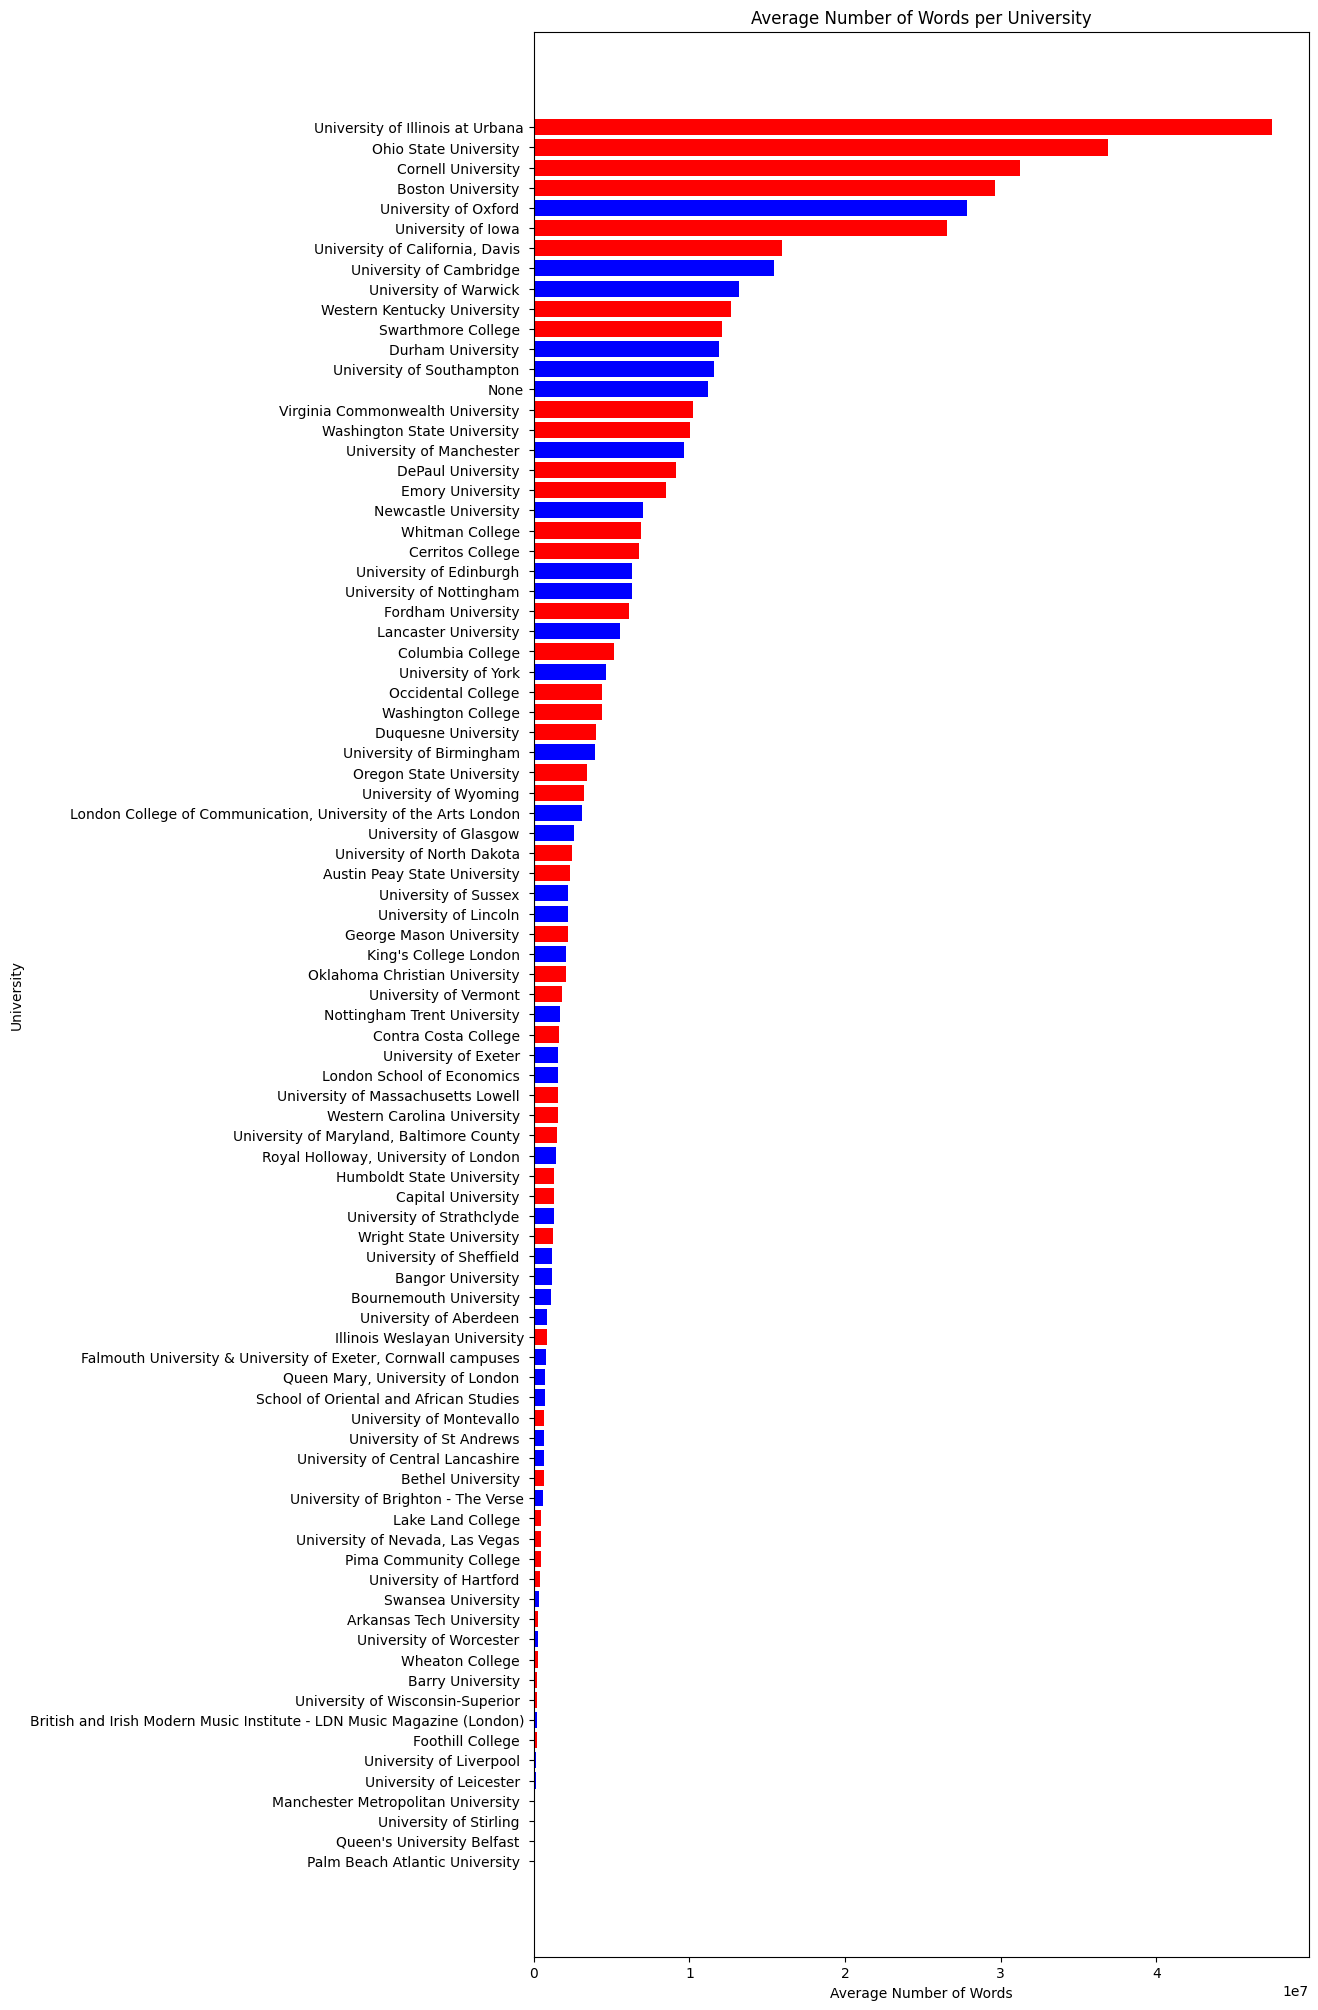

In [ ]:
# Sort the DataFrame by the "avg_words" column
sums = sums.sort_values('text')

# Create a colormap that maps each country to a unique color
colormap = {'us': 'red', 'uk': 'blue'}
colors = [colormap[c] for c in sums['country']]

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 25))
ax.barh(sums['university'], sums['text'], color=colors)

# Add labels and title
ax.set_xlabel('Total Number of Words')
ax.set_ylabel('University')
ax.set_title('Total Number of Words per University')

# Show the plot
plt.show()

In [ ]:
print(sums[sums['country'] == 'us']['text'].mean())
print(sums[sums['country'] == 'uk']['text'].mean())

from scipy.stats import ttest_ind

# subset the dataframe to include only US and UK universities
us = sums[sums['country'] == 'us']['text']
uk = sums[sums['country'] == 'uk']['text']

# perform t-test
t_stat, p_val = ttest_ind(us, uk)

# print the result
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_val:.3f}")

6972346.0
4000274.073170732
t-statistic: 1.595
p-value: 0.114


### Descriptive Stat Plot #3: Publishing lifecycle of a newspaper

Number of articles over time for each newspaper

In [ ]:
# Drop the rows where date is not in the correct datetime format

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

# Drop the rows where date is NaT
df.loc[df['date'].notna(), 'month'] = df.loc[df['date'].notna(), 'date'].dt.month

# Group the data by newspaper and year and count the number of rows in each group
counts = df.groupby([df['country'], df['month']]).size().reset_index(name='count')

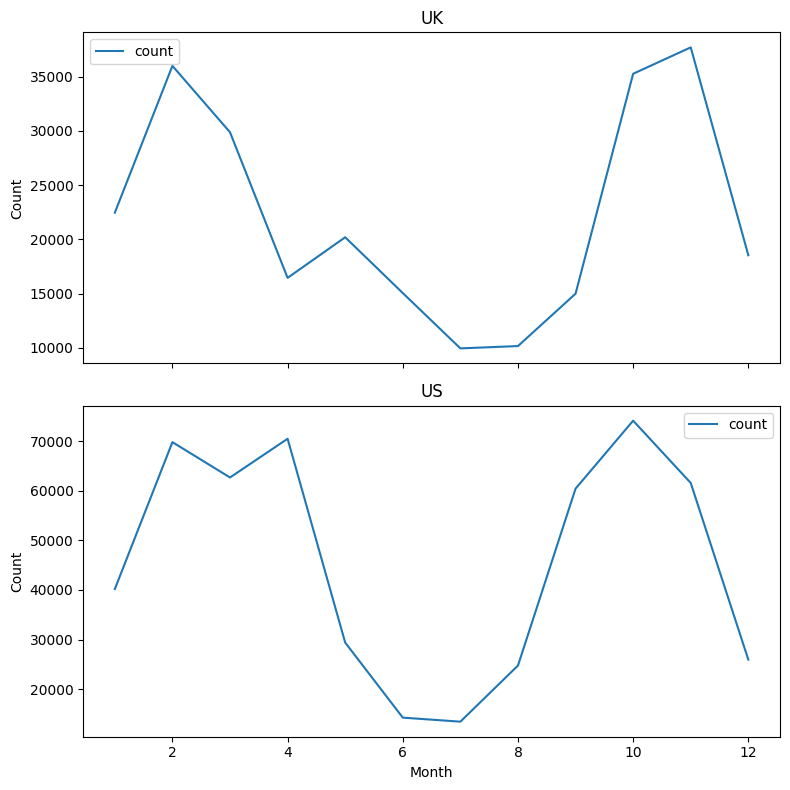

In [ ]:
# create 2 subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex=True)

# plot UK data on top subplot
counts[counts['country'] == 'uk'].plot(x='month', y='count', ax=ax1)
ax1.set_title('UK')
ax1.set_ylabel('Count')

# plot US data on bottom subplot
counts[counts['country'] == 'us'].plot(x='month', y='count', ax=ax2)
ax2.set_title('US')
ax2.set_xlabel('Month')
ax2.set_ylabel('Count')

# adjust layout to prevent overlapping of axis labels
plt.tight_layout()
plt.show()

### Descriptive Stat Plot #4: Number of unique writers of a newspaper over time

Similar to the previous one but show the direct engagement of newspaper with the student body over time

In [ ]:
authors = df.groupby(['country', 'month'])['author'].nunique().reset_index(name='count')
authors

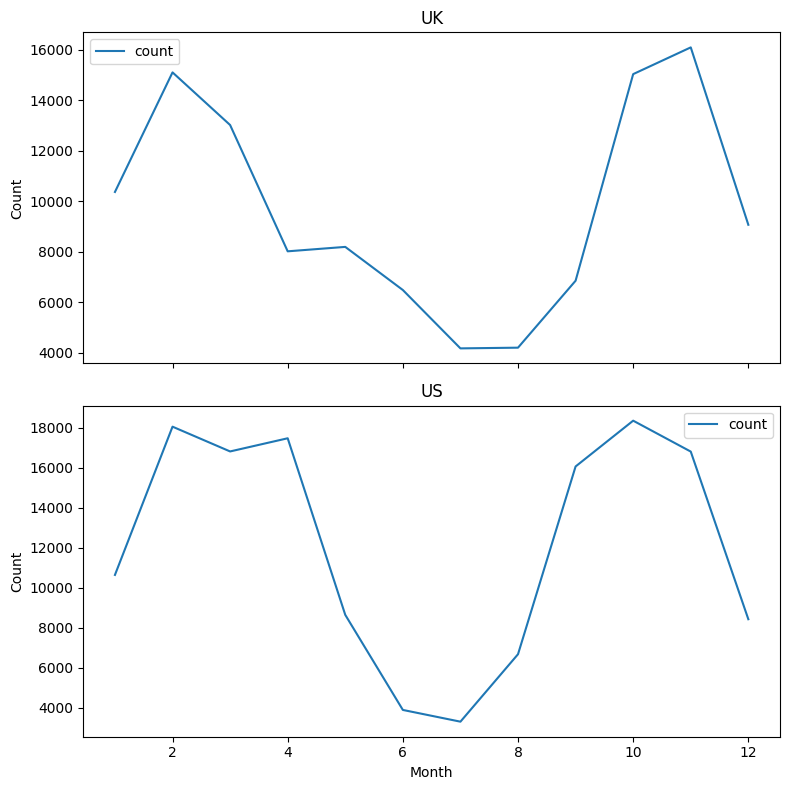

In [ ]:
# create 2 subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex=True)

# plot UK data on top subplot
authors[authors['country'] == 'uk'].plot(x='month', y='count', ax=ax1)
ax1.set_title('UK')
ax1.set_ylabel('Count')

# plot US data on bottom subplot
authors[authors['country'] == 'us'].plot(x='month', y='count', ax=ax2)
ax2.set_title('US')
ax2.set_xlabel('Month')
ax2.set_ylabel('Count')

# adjust layout to prevent overlapping of axis labels
plt.tight_layout()
plt.show()

### Descriptive Stat Plot #5: Map all the newspapers from the US and the UK

In [ ]:
import folium
from geopy.geocoders import Nominatim

# initialize geolocator
geolocator = Nominatim(user_agent='my_app')

# get coordinates for each university
locations = {}
for uni in uk_liwc.drop(11)['university']:
    location = geolocator.geocode(uni)
    if location:
        locations[uni] = (location.latitude, location.longitude)

# create map object centered at the UK
uk_coords = (51.5074, -0.1278)
m = folium.Map(location=uk_coords, zoom_start=4)

# add tile layer using Mapbox provider
folium.TileLayer(
    tiles='https://api.mapbox.com/styles/v1/mapbox/streets-v11/tiles/{z}/{x}/{y}?access_token=pk.eyJ1IjoiYXNobGV5MTQxMiIsImEiOiJjbGdzMTV0ZDIwdHBlM3Ntczg3NjNid3gxIn0.21y4m-V-HBgeR3mBlonSgA',
    attr='Mapbox',
    name='Mapbox Streets',
    overlay=True,
    control=True,
).add_to(m)

# add markers with university name labels
for uni, coords in locations.items():
    folium.map.Marker(
        location=coords,
        icon=folium.features.DivIcon(html=f"<div style='font-size: 5pt; background-color: white; border: 0.5px solid black; width: 80px; height: 12px; border-radius: 10px; display: flex; justify-content: center; align-items: center;'>{uni}</div>")
    ).add_to(m)

# add markers with location icons
for uni, coords in locations.items():
    folium.Marker(
        location=coords,
        icon=folium.Icon(icon='location')
    ).add_to(m)

# display map
m

In [ ]:
uk_liwc.drop(11) # there's a none value, im dropping it

In [ ]:
# initialize geolocator
geolocator = Nominatim(user_agent='my_app')

# get coordinates for each university
locations = {}
for uni in us_liwc['university']:
    location = geolocator.geocode(uni)
    if location:
        locations[uni] = (location.latitude, location.longitude)

# create map object centered at the US
us_coords = (37.0902, -95.7129)
m = folium.Map(location=us_coords, zoom_start=4)

# add tile layer using Mapbox provider
folium.TileLayer(
    tiles='https://api.mapbox.com/styles/v1/mapbox/streets-v11/tiles/{z}/{x}/{y}?access_token=pk.eyJ1IjoiYXNobGV5MTQxMiIsImEiOiJjbGdzMTV0ZDIwdHBlM3Ntczg3NjNid3gxIn0.21y4m-V-HBgeR3mBlonSgA',
    attr='Mapbox',
    name='Mapbox Streets',
    overlay=True,
    control=True,
).add_to(m)

# add markers with university name labels
for uni, coords in locations.items():
    folium.map.Marker(
        location=coords,
        icon=folium.features.DivIcon(html=f"<div style='font-size: 4pt; background-color: white; border: 0.5px solid black; width: 80px; height: 12px; border-radius: 8px; display: flex; justify-content: center; align-items: center;'>{uni}</div>")
    ).add_to(m)

# add markers with location icons
for uni, coords in locations.items():
    folium.Marker(
        location=coords,
        icon=folium.Icon(icon='location')
    ).add_to(m)

# display map
m

## Import the LIWC library and print out category names for inspection

In [ ]:
!pip install liwc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import liwc
from liwc import load_token_parser

parse, category_names = liwc.load_token_parser('/content/drive/MyDrive/EY 2022-2023 Junior/Spring 2023/SOCSC-UH 2213 Textual Analysis/textual analysis final project/resources/LIWC2015.dic')

In [ ]:
category_names

['function (Function Words)',
 'pronoun (Pronouns)',
 'ppron (Personal Pronouns)',
 'i (I)',
 'we (We)',
 'you (You)',
 'shehe (SheHe)',
 'they (They)',
 'ipron (Impersonal Pronouns)',
 'article (Articles)',
 'prep (Prepositions)',
 'auxverb (Auxiliary Verbs)',
 'adverb (Adverbs)',
 'conj (Conjunctions)',
 'negate (Negations)',
 'verb (Verbs)',
 'adj (Adjectives)',
 'compare (Comparisons)',
 'interrog (Interrogatives)',
 'number (Numbers)',
 'quant (Quantifiers)',
 'affect (Affect)',
 'posemo (Positive Emotions)',
 'negemo (Negative Emotions)',
 'anx (Anx)',
 'anger (Anger)',
 'sad (Sad)',
 'social (Social)',
 'family (Family)',
 'friend (Friends)',
 'female (Female)',
 'male (Male)',
 'cogproc (Cognitive Processes)',
 'insight (Insight)',
 'cause (Causal)',
 'discrep (Discrepancies)',
 'tentat (Tentative)',
 'certain (Certainty)',
 'differ (Differentiation)',
 'percept (Perceptual Processes)',
 'see (See)',
 'hear (Hear)',
 'feel (Feel)',
 'bio (Biological Processes)',
 'body (Body)',

### Calculate the percentage of each word category

Plot roughly to see the difference between the 2 corpus

In [ ]:
uk_text = pd.read_csv(path+'us_preprocessed_tokens.csv', usecols =['file_name','university','tokenized_text'])

In [ ]:
category_counts_by_uni = {}

start_time = time.time()

for uni, uni_text in uk_text.groupby('university')['tokenized_text']:
    uni_category_counts = Counter(category for row in uni_text for token in ast.literal_eval(row) for category in parse(token))
    category_counts_by_uni[uni] = uni_category_counts

all_categories_by_uni = {uni: [(category, count) for category, count in uni_category_counts.items()] for uni, uni_category_counts in category_counts_by_uni.items()}

end_time = time.time()

print(f"Total time: {end_time - start_time} seconds")

all_categories_by_uni

Total time: 1912.8888521194458 seconds


{'Arkansas Tech University ': [('percept (Perceptual Processes)', 6536),
  ('see (See)', 2651),
  ('function (Function Words)', 119280),
  ('auxverb (Auxiliary Verbs)', 16906),
  ('verb (Verbs)', 32735),
  ('focuspresent (Present Focus)', 24052),
  ('cogproc (Cognitive Processes)', 18067),
  ('insight (Insight)', 4115),
  ('focuspast (Past Focus)', 7454),
  ('prep (Prepositions)', 36926),
  ('pronoun (Pronouns)', 25695),
  ('ipron (Impersonal Pronouns)', 10977),
  ('work (Work)', 10085),
  ('affect (Affect)', 9607),
  ('posemo (Positive Emotions)', 6923),
  ('drives (Drives)', 20470),
  ('achieve (Achievement)', 4953),
  ('reward (Reward)', 3956),
  ('article (Articles)', 21196),
  ('adverb (Adverbs)', 7255),
  ('relativ (Relativity)', 34165),
  ('space (Space)', 17330),
  ('time (Time)', 12084),
  ('conj (Conjunctions)', 14723),
  ('interrog (Interrogatives)', 2799),
  ('cause (Causal)', 2840),
  ('quant (Quantifiers)', 4169),
  ('ppron (Personal Pronouns)', 14718),
  ('we (We)', 2174

In [ ]:
import pandas as pd

# Assume all_categories_by_uni is a dictionary of lists as described above

# Create an empty list to hold the individual dataframes for each university
dfs = []

# Iterate over each university and its corresponding category counts
for uni, category_counts in all_categories_by_uni.items():
    # Create a dataframe for the current university's category counts
    df = pd.DataFrame(category_counts, columns=['category', 'count'])
    # Add a column for the university name
    df['university'] = uni
    # Append the dataframe to the list
    dfs.append(df)

# Concatenate all the dataframes into a single dataframe
all_categories_df = pd.concat(dfs, ignore_index=True)

In [ ]:
all_categories_df.set_index('university', inplace=True)
all_categories_df

,category,count
university,,
Arkansas Tech University,percept (Perceptual Processes),6536
Arkansas Tech University,see (See),2651
Arkansas Tech University,function (Function Words),119280
Arkansas Tech University,auxverb (Auxiliary Verbs),16906
Arkansas Tech University,verb (Verbs),32735
...,...,...
Wright State University,female (Female),5737
Wright State University,assent (Assent),293
Wright State University,family (Family),1137


In [ ]:
import pandas as pd

# Assume all_categories_df is a dataframe as described above

# Group the dataframe by university and category, and sum the counts for each group
grouped_df = all_categories_df.groupby(['university', 'category']).sum()

# Reset the index of the grouped dataframe
grouped_df = grouped_df.reset_index()

# Use pivot_table to create a new dataframe with category columns and count values
pivot_df = pd.pivot_table(grouped_df, index='university', columns='category', values='count')

# Reset the index and column names of the new dataframe
pivot_df = pivot_df.reset_index()
pivot_df.columns.name = None

# Print the resulting dataframe
pivot_df

,university,achieve (Achievement),adj (Adjectives),adverb (Adverbs),affect (Affect),affiliation (Affiliation),anger (Anger),anx (Anx),article (Articles),assent (Assent),...,social (Social),space (Space),swear (Swear),tentat (Tentative),they (They),time (Time),verb (Verbs),we (We),work (Work),you (You)
0,Arkansas Tech University,4953.0,9630.0,7255.0,9607.0,6298.0,731.0,553.0,21196.0,129.0,...,21535.0,17330.0,46.0,3970.0,2455.0,12084.0,32735.0,2174.0,10085.0,2144.0
1,Austin Peay State University,47996.0,87206.0,56971.0,80968.0,49463.0,8555.0,4104.0,195258.0,792.0,...,177574.0,166249.0,415.0,29079.0,22253.0,114561.0,261787.0,14698.0,101856.0,12901.0
2,Barry University,3770.0,8791.0,5541.0,8491.0,4477.0,624.0,545.0,17449.0,51.0,...,18898.0,14841.0,11.0,3061.0,2264.0,10190.0,25583.0,1114.0,12710.0,1963.0
3,Bethel University,9576.0,22707.0,17814.0,21285.0,16805.0,1625.0,1130.0,46837.0,283.0,...,60497.0,44100.0,163.0,7880.0,5755.0,28967.0,73610.0,4814.0,27119.0,5312.0
4,Boston University,605735.0,1135841.0,773943.0,1086606.0,700166.0,107018.0,59691.0,2604818.0,10101.0,...,2527552.0,2087498.0,7441.0,407899.0,293914.0,1346650.0,3442270.0,262974.0,1294860.0,141307.0
5,Capital University,21517.0,51917.0,39317.0,44250.0,28465.0,3604.0,2543.0,110984.0,564.0,...,103221.0,88372.0,415.0,21607.0,13110.0,61108.0,163912.0,8971.0,56514.0,10311.0
6,Cerritos College,135338.0,234221.0,194230.0,244081.0,166753.0,21763.0,11708.0,559835.0,5978.0,...,582441.0,437035.0,2400.0,93790.0,73333.0,288832.0,849379.0,55518.0,314373.0,47004.0
7,Columbia College,75517.0,179731.0,126350.0,159184.0,106830.0,14800.0,8901.0,413974.0,1914.0,...,433670.0,330111.0,1079.0,67668.0,47795.0,204392.0,602325.0,37810.0,245928.0,27924.0
8,Contra Costa College,31390.0,54150.0,37288.0,51906.0,39696.0,4664.0,2962.0,141081.0,396.0,...,142583.0,110143.0,394.0,19195.0,15572.0,68640.0,195591.0,11276.0,90763.0,4414.0
9,Cornell University,675794.0,1275983.0,812843.0,1133648.0,746638.0,107046.0,63371.0,2764927.0,13529.0,...,2413246.0,2186678.0,13338.0,434659.0,242420.0,1502350.0,3379484.0,289545.0,1319150.0,174931.0


In [ ]:
pivot_df.to_csv(path+'us_liwc.csv',index=False)

In [ ]:
word_counts_by_uni = {}

for uni, uni_text in uk_text.groupby('university')['tokenized_text']:
    word_count = sum(len(ast.literal_eval(row)) for row in uni_text)
    word_counts_by_uni[uni] = word_count

word_counts_by_uni

{'Arkansas Tech University ': 302466,
 'Austin Peay State University ': 2707911,
 'Barry University ': 275567,
 'Bethel University ': 754806,
 'Boston University ': 35005190,
 'Capital University ': 1546693,
 'Cerritos College ': 7862297,
 'Columbia College ': 6024126,
 'Contra Costa College ': 1841945,
 'Cornell University ': 36829499,
 'DePaul University ': 10751339,
 'Duquesne University ': 4761634,
 'Emory University ': 9966668,
 'Foothill College ': 232477,
 'Fordham University ': 7247116,
 'George Mason University ': 2546298,
 'Humboldt State University ': 1547592,
 'Illinois Weslayan University': 988561,
 'Lake Land College ': 567913,
 'Occidental College ': 5186563,
 'Ohio State University ': 43487882,
 'Oklahoma Christian University ': 2419500,
 'Oregon State University ': 3943239,
 'Palm Beach Atlantic University ': 38567,
 'Pima Community College ': 567076,
 'Swarthmore College ': 14222326,
 'University of California, Davis ': 18698821,
 'University of Hartford ': 486566,
 '

In [ ]:
word_counts = [word_counts_by_uni.get(uni, 0) for uni in pivot_df['university']]
pivot_df['word_count'] = word_counts
pivot_df

,university,achieve (Achievement),adj (Adjectives),adverb (Adverbs),affect (Affect),affiliation (Affiliation),anger (Anger),anx (Anx),article (Articles),assent (Assent),...,space (Space),swear (Swear),tentat (Tentative),they (They),time (Time),verb (Verbs),we (We),work (Work),you (You),word_count
0,Arkansas Tech University,4953.0,9630.0,7255.0,9607.0,6298.0,731.0,553.0,21196.0,129.0,...,17330.0,46.0,3970.0,2455.0,12084.0,32735.0,2174.0,10085.0,2144.0,302466
1,Austin Peay State University,47996.0,87206.0,56971.0,80968.0,49463.0,8555.0,4104.0,195258.0,792.0,...,166249.0,415.0,29079.0,22253.0,114561.0,261787.0,14698.0,101856.0,12901.0,2707911
2,Barry University,3770.0,8791.0,5541.0,8491.0,4477.0,624.0,545.0,17449.0,51.0,...,14841.0,11.0,3061.0,2264.0,10190.0,25583.0,1114.0,12710.0,1963.0,275567
3,Bethel University,9576.0,22707.0,17814.0,21285.0,16805.0,1625.0,1130.0,46837.0,283.0,...,44100.0,163.0,7880.0,5755.0,28967.0,73610.0,4814.0,27119.0,5312.0,754806
4,Boston University,605735.0,1135841.0,773943.0,1086606.0,700166.0,107018.0,59691.0,2604818.0,10101.0,...,2087498.0,7441.0,407899.0,293914.0,1346650.0,3442270.0,262974.0,1294860.0,141307.0,35005190
5,Capital University,21517.0,51917.0,39317.0,44250.0,28465.0,3604.0,2543.0,110984.0,564.0,...,88372.0,415.0,21607.0,13110.0,61108.0,163912.0,8971.0,56514.0,10311.0,1546693
6,Cerritos College,135338.0,234221.0,194230.0,244081.0,166753.0,21763.0,11708.0,559835.0,5978.0,...,437035.0,2400.0,93790.0,73333.0,288832.0,849379.0,55518.0,314373.0,47004.0,7862297
7,Columbia College,75517.0,179731.0,126350.0,159184.0,106830.0,14800.0,8901.0,413974.0,1914.0,...,330111.0,1079.0,67668.0,47795.0,204392.0,602325.0,37810.0,245928.0,27924.0,6024126
8,Contra Costa College,31390.0,54150.0,37288.0,51906.0,39696.0,4664.0,2962.0,141081.0,396.0,...,110143.0,394.0,19195.0,15572.0,68640.0,195591.0,11276.0,90763.0,4414.0,1841945
9,Cornell University,675794.0,1275983.0,812843.0,1133648.0,746638.0,107046.0,63371.0,2764927.0,13529.0,...,2186678.0,13338.0,434659.0,242420.0,1502350.0,3379484.0,289545.0,1319150.0,174931.0,36829499


In [ ]:
cols_to_divide = pivot_df.columns[1:-1]  # select columns 2 to second last
pivot_df[cols_to_divide] = pivot_df[cols_to_divide].div(pivot_df['word_count'], axis=0)
pivot_df

,university,achieve (Achievement),adj (Adjectives),adverb (Adverbs),affect (Affect),affiliation (Affiliation),anger (Anger),anx (Anx),article (Articles),assent (Assent),...,space (Space),swear (Swear),tentat (Tentative),they (They),time (Time),verb (Verbs),we (We),work (Work),you (You),word_count
0,Arkansas Tech University,0.016375,0.031838,0.023986,0.031762,0.020822,0.002417,0.001828,0.070077,0.000426,...,0.057296,0.000152,0.013125,0.008117,0.039952,0.108227,0.007188,0.033343,0.007088,302466
1,Austin Peay State University,0.017724,0.032204,0.021039,0.029901,0.018266,0.003159,0.001516,0.072107,0.000292,...,0.061394,0.000153,0.010739,0.008218,0.042306,0.096675,0.005428,0.037614,0.004764,2707911
2,Barry University,0.013681,0.031901,0.020108,0.030813,0.016247,0.002264,0.001978,0.063320,0.000185,...,0.053856,0.000040,0.011108,0.008216,0.036978,0.092838,0.004043,0.046123,0.007123,275567
3,Bethel University,0.012687,0.030083,0.023601,0.028199,0.022264,0.002153,0.001497,0.062052,0.000375,...,0.058426,0.000216,0.010440,0.007624,0.038377,0.097522,0.006378,0.035928,0.007038,754806
4,Boston University,0.017304,0.032448,0.022109,0.031041,0.020002,0.003057,0.001705,0.074412,0.000289,...,0.059634,0.000213,0.011653,0.008396,0.038470,0.098336,0.007512,0.036991,0.004037,35005190
5,Capital University,0.013912,0.033566,0.025420,0.028609,0.018404,0.002330,0.001644,0.071756,0.000365,...,0.057136,0.000268,0.013970,0.008476,0.039509,0.105976,0.005800,0.036539,0.006666,1546693
6,Cerritos College,0.017214,0.029790,0.024704,0.031044,0.021209,0.002768,0.001489,0.071205,0.000760,...,0.055586,0.000305,0.011929,0.009327,0.036736,0.108032,0.007061,0.039985,0.005978,7862297
7,Columbia College,0.012536,0.029835,0.020974,0.026424,0.017734,0.002457,0.001478,0.068719,0.000318,...,0.054798,0.000179,0.011233,0.007934,0.033929,0.099985,0.006276,0.040824,0.004635,6024126
8,Contra Costa College,0.017042,0.029398,0.020244,0.028180,0.021551,0.002532,0.001608,0.076593,0.000215,...,0.059797,0.000214,0.010421,0.008454,0.037265,0.106187,0.006122,0.049276,0.002396,1841945
9,Cornell University,0.018349,0.034646,0.022070,0.030781,0.020273,0.002907,0.001721,0.075074,0.000367,...,0.059373,0.000362,0.011802,0.006582,0.040792,0.091760,0.007862,0.035818,0.004750,36829499


In [ ]:
pivot_df[cols_to_divide] = pivot_df[cols_to_divide] * 100
pivot_df

,university,achieve (Achievement),adj (Adjectives),adverb (Adverbs),affect (Affect),affiliation (Affiliation),anger (Anger),anx (Anx),article (Articles),assent (Assent),...,space (Space),swear (Swear),tentat (Tentative),they (They),time (Time),verb (Verbs),we (We),work (Work),you (You),word_count
0,Arkansas Tech University,1.637539,3.183829,2.398617,3.176225,2.082218,0.241680,0.182830,7.007730,0.042649,...,5.729570,0.015208,1.312544,0.811661,3.995160,10.822704,0.718758,3.334259,0.708840,302466
1,Austin Peay State University,1.772436,3.220416,2.103873,2.990054,1.826611,0.315926,0.151556,7.210651,0.029248,...,6.139382,0.015325,1.073854,0.821777,4.230604,9.667489,0.542780,3.761423,0.476419,2707911
2,Barry University,1.368088,3.190150,2.010763,3.081283,1.624650,0.226442,0.197774,6.332035,0.018507,...,5.385623,0.003992,1.110801,0.821579,3.697830,9.283768,0.404257,4.612308,0.712349,275567
3,Bethel University,1.268670,3.008323,2.360077,2.819930,2.226400,0.215287,0.149707,6.205171,0.037493,...,5.842561,0.021595,1.043977,0.762448,3.837675,9.752175,0.637780,3.592844,0.703757,754806
4,Boston University,1.730415,3.244779,2.210938,3.104128,2.000178,0.305720,0.170520,7.441234,0.028856,...,5.963396,0.021257,1.165253,0.839630,3.847001,9.833599,0.751243,3.699051,0.403674,35005190
5,Capital University,1.391162,3.356645,2.542004,2.860943,1.840378,0.233013,0.164415,7.175567,0.036465,...,5.713610,0.026831,1.396981,0.847615,3.950881,10.597578,0.580012,3.653860,0.666648,1546693
6,Cerritos College,1.721354,2.979040,2.470398,3.104449,2.120920,0.276802,0.148913,7.120502,0.076034,...,5.558617,0.030525,1.192908,0.932717,3.673634,10.803191,0.706130,3.998488,0.597841,7862297
7,Columbia College,1.253576,2.983520,2.097400,2.642441,1.773369,0.245679,0.147756,6.871935,0.031772,...,5.479816,0.017911,1.123283,0.793393,3.392891,9.998546,0.627643,4.082385,0.463536,6024126
8,Contra Costa College,1.704177,2.939827,2.024382,2.817999,2.155113,0.253211,0.160808,7.659349,0.021499,...,5.979712,0.021390,1.042105,0.845411,3.726496,10.618721,0.612179,4.927563,0.239638,1841945
9,Cornell University,1.834926,3.464568,2.207043,3.078098,2.027283,0.290653,0.172066,7.507371,0.036734,...,5.937300,0.036216,1.180193,0.658222,4.079203,9.176025,0.786177,3.581776,0.474975,36829499


t-test result: t = -0.22, p-value = 0.82


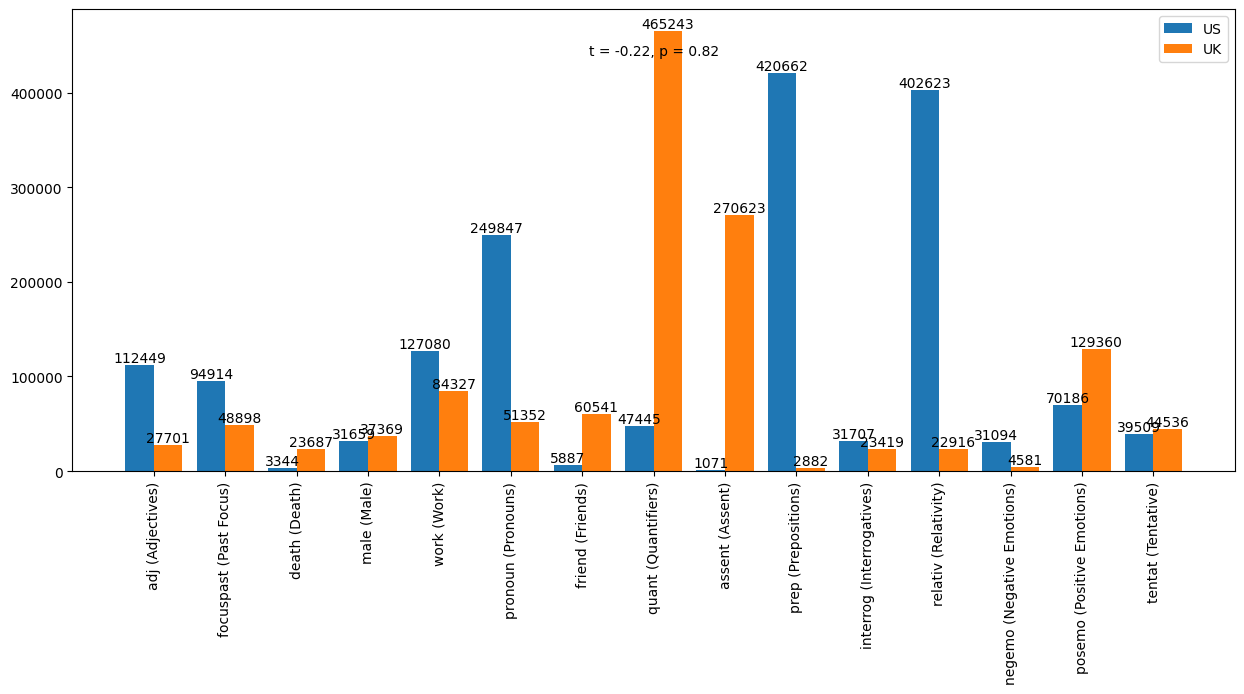

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import random
import scipy.stats as stats

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Get 10 random categories for the US and UK
us_categories = random.sample(list(us_counts.keys()), 15)
uk_categories = random.sample(list(uk_counts.keys()), 15)

# Get the count for each category in the US and UK (0 if not present)
us_counter = Counter({category: us_counts.get(category, 0) for category in us_categories})
uk_counter = Counter({category: uk_counts.get(category, 0) for category in uk_categories})

# Plot the US and UK data on the same graph
bar_width = 0.4
us_pos = [i for i in range(len(us_counter))]
uk_pos = [i + bar_width for i in range(len(uk_counter))]
us_bars = ax.bar(us_pos, us_counter.values(), width=bar_width, label="US")
uk_bars = ax.bar(uk_pos, uk_counter.values(), width=bar_width, label="UK")

# Perform a t-test between the US and UK data
t, p = stats.ttest_ind(list(us_counts.values()), list(uk_counts.values()))
print("t-test result: t = {:.2f}, p-value = {:.2f}".format(t, p))

# Set x-axis tick labels and bar value labels
plt.xticks([i + bar_width/2 for i in range(len(us_categories))], us_categories, rotation=90)
for bar, value in zip(us_bars, us_counter.values()):
    ax.text(bar.get_x() + bar_width/2, bar.get_height(), value, ha='center', va='bottom')
for bar, value in zip(uk_bars, uk_counter.values()):
    ax.text(bar.get_x() + bar_width/2, bar.get_height(), value, ha='center', va='bottom')

# Add a legend
ax.legend()

# Add the t-test result to the plot
ax.text(0.5, 0.9, "t = {:.2f}, p = {:.2f}".format(t, p), transform=ax.transAxes, ha='center')

# Show the plot
plt.show()


### Try to calculate the scores

#### 1. Analytic:

In [ ]:
pivot_df.columns

Index(['university', 'achieve (Achievement)', 'adj (Adjectives)',
       'adverb (Adverbs)', 'affect (Affect)', 'affiliation (Affiliation)',
       'anger (Anger)', 'anx (Anx)', 'article (Articles)', 'assent (Assent)',
       'auxverb (Auxiliary Verbs)', 'bio (Biological Processes)',
       'body (Body)', 'cause (Causal)', 'certain (Certainty)',
       'cogproc (Cognitive Processes)', 'compare (Comparisons)',
       'conj (Conjunctions)', 'death (Death)', 'differ (Differentiation)',
       'discrep (Discrepancies)', 'drives (Drives)', 'family (Family)',
       'feel (Feel)', 'female (Female)', 'filler (Filler Words)',
       'focusfuture (Future Focus)', 'focuspast (Past Focus)',
       'focuspresent (Present Focus)', 'friend (Friends)',
       'function (Function Words)', 'health (Health)', 'hear (Hear)',
       'home (Home)', 'i (I)', 'informal (Informal Language)',
       'ingest (Ingest)', 'insight (Insight)', 'interrog (Interrogatives)',
       'ipron (Impersonal Pronouns)', 'leis

In [ ]:
pivot_df['analytic'] = 30 + pivot_df['article (Articles)'] + pivot_df['prep (Prepositions)']\
                        - pivot_df['ppron (Personal Pronouns)'] - pivot_df['ipron (Impersonal Pronouns)'] \
                        - pivot_df['auxverb (Auxiliary Verbs)'] - pivot_df['conj (Conjunctions)']\
                        - pivot_df['adverb (Adverbs)'] - pivot_df['negate (Negations)']

In [ ]:
CDI = 30 + article + preposition - personal pronoun - impersonal pronoun – auxiliary verb – conjunction – adverb – negation

In [ ]:
pivot_df.to_csv(path+'us_liwc.csv',index=False)

#### 2. Clout & Authenticity & Emotional Tone

### Try to validate using NY Times and BBC

In [ ]:
path = path + 'validation/'

In [ ]:
nyt = pd.read_csv(path+'nyt.csv')
guardian = pd.read_csv(path+'guardian.csv')

In [ ]:
guardian

,Unnamed: 0,Headline,Published Date,Author,Text,topic,source
0,0,UK ministers discuss voluntary price limits fo...,2023-05-28T15:44:19Z,Rupert Jones and Peter Walker,<p>Ministers are working with supermarkets to ...,business,guardian
1,1,Terrible news for Sunak and Hunt puts election...,2023-05-28T09:12:17Z,Larry Elliott,<p>There was only ever an outside chance that ...,business,guardian
2,2,Even Farage says Brexit has failed. Why won’t ...,2023-05-28T06:00:24Z,William Keegan,"<p>What do my friends the musicians Sting, Joh...",business,guardian
3,3,What is the US debt ceiling and what would hap...,2023-05-28T02:12:14Z,Lauren Aratani,"<p>Joe Biden and the House Republican speaker,...",business,guardian
4,4,Rail strikes: Hopes of a resolution have been ...,2023-05-27T23:05:15Z,Gwyn Topham Transport correspondent,"<p>Almost a year since <a href=""https://www.th...",business,guardian
...,...,...,...,...,...,...,...
1495,1495,Near 50% fall in Silvergate’s shares over FTX ...,2023-03-02T17:10:12Z,Alex Hern Technology editor,<p>The share price of cryptocurrency-focused U...,technology,guardian
1496,1496,"‘They’re more concerned about profit’: Osha, D...",2023-03-02T07:00:05Z,Michael Sainato,<p>The US’s top workplace safety regulator and...,technology,guardian
1497,1497,Last night AI DJ saved my life? Testing Spotif...,2023-03-02T06:00:06Z,Alaina Demopoulos,<p>I’m listening to Radiohead’s Creep on the r...,technology,guardian
1498,1498,NSO Group co-founder emerges as new majority o...,2023-03-01T19:54:46Z,Stephanie Kirchgaessner in Washington,<p>One of NSO Group’s founders appears to have...,technology,guardian


In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nyt['Text'][0]

"When you visit a McDonald's, a Jiffy Lube or a Hilton Garden Inn, you may assume you’re visiting one business. More likely, you’re actually visiting two: the operator of that particular location, known as the franchisee, and the larger company that owns the intellectual property behind it, or the franchiser. Conflict is inherent in that relationship, but it has hit a boil in recent months, as franchisees say they’re being squeezed out of the profits their business generates through new fees, required vendors and constraints on their ability to sell. On Monday, the Government Accountability Office released a  report  finding that franchisees “do not enjoy the full benefit of the risks they bear,” citing interviews with dozens of small-business owners who said they lacked control over basic operations that determined their ability to earn a profit. They’ve found a sympathetic ear in the Biden administration and in several state legislatures, giving rise to a growing wave of proposals to

In [ ]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()

tokenized_texts = []  # List to store tokenized texts

for index, row in nyt.iterrows():
    text = row['Text']
    if isinstance(text, str):  # Check if the value is a string
        tokenized_text = [stemmer.stem(word) for word in word_tokenize(text)]
    else:
        tokenized_text = ''
    tokenized_texts.append(tokenized_text)

nyt['tokenized_text'] = tokenized_texts  # Assign the list to the 'tokenized_text' column
nyt

,Unnamed: 0,Headline,Published Date,Author,Text,topic,source,tokenized_text
0,0.0,"Franchisers, Facing Challenges to Business Mod...",2023-04-20T17:30:51+0000,By Lydia DePillis,"When you visit a McDonald's, a Jiffy Lube or a...",business,nyt,"[when, you, visit, a, mcdonald, 's, ,, a, jiff..."
1,1.0,"Fox News Settled Its Suit, but Similar 2020 El...",2023-04-19T18:02:37+0000,By Lora Kelley,"On Tuesday, Fox News hastily agreed to pay $7...",business,nyt,"[on, tuesday, ,, fox, new, hastili, agre, to, ..."
2,2.0,Fox Will Pay $787.5 Million to Settle Defamati...,2023-04-18T23:54:45+0000,By Jeremy W. Peters and Katie Robertson,Fox News abruptly agreed on Tuesday to pay $78...,business,nyt,"[fox, new, abruptli, agre, on, tuesday, to, pa..."
3,3.0,Can a Global Talent Agency Make Atlanta an Art...,2023-04-18T09:00:25+0000,By Tariro Mzezewa,ATLANTA — On a recent weekday evening in thi...,business,nyt,"[atlanta, —, on, a, recent, weekday, even, in,..."
4,4.0,How Small Businesses Can Find Safety Before th...,2023-04-01T09:00:12+0000,By Amy Haimerl,"The collapse of two regional lenders, Silicon...",business,nyt,"[the, collaps, of, two, region, lender, ,, sil..."
...,...,...,...,...,...,...,...,...
1495,NaN,‘Everybody Is Welcome Here’,2023-05-05T09:00:29+0000,By Kurt Streeter and Mason Trinca,"PORTLAND, Ore. — The soccer coach looked out a...",sports,nyt,"[portland, ,, ore., —, the, soccer, coach, loo..."
1496,NaN,Pop-Up Grand Prix: The Formula 1 Race Fans Don...,2023-05-05T11:24:42+0000,By Patricia Mazzei,"MIAMI GARDENS, Fla. — By late Sunday night in ...",sports,nyt,"[miami, garden, ,, fla., —, by, late, sunday, ..."
1497,NaN,The Prince With No Throne,2023-05-05T14:00:15+0000,By Alyson Krueger,VIENNA — Ferdinand Habsburg-Lothringen sometim...,sports,nyt,"[vienna, —, ferdinand, habsburg-lothringen, so..."
1498,NaN,Expert Picks: Who Will Win the 2023 Kentucky D...,2023-05-05T13:00:33+0000,By Joe Drape and Melissa Hoppert,The horses in the 149th running of the Kentuc...,sports,nyt,"[the, hors, in, the, 149th, run, of, the, kent..."


In [ ]:
from bs4 import BeautifulSoup

tokenized_texts = []  # List to store tokenized texts

for index, row in guardian.iterrows():
    html_text = row['Text']
    # Parse the HTML
    soup = BeautifulSoup(html_text, 'html.parser')
    # Get the text from the parsed HTML
    text = soup.get_text()
    if isinstance(text, str):  # Check if the value is a string
        tokenized_text = [stemmer.stem(word) for word in word_tokenize(text)]
    else:
        tokenized_text = ''
    tokenized_texts.append(tokenized_text)

guardian['tokenized_text'] = tokenized_texts  # Assign the list to the 'tokenized_text' column
guardian

,Unnamed: 0,Headline,Published Date,Author,Text,topic,source,tokenized_text
0,0,UK ministers discuss voluntary price limits fo...,2023-05-28T15:44:19Z,Rupert Jones and Peter Walker,<p>Ministers are working with supermarkets to ...,business,guardian,"[minist, are, work, with, supermarket, to, vol..."
1,1,Terrible news for Sunak and Hunt puts election...,2023-05-28T09:12:17Z,Larry Elliott,<p>There was only ever an outside chance that ...,business,guardian,"[there, wa, onli, ever, an, outsid, chanc, tha..."
2,2,Even Farage says Brexit has failed. Why won’t ...,2023-05-28T06:00:24Z,William Keegan,"<p>What do my friends the musicians Sting, Joh...",business,guardian,"[what, do, my, friend, the, musician, sting, ,..."
3,3,What is the US debt ceiling and what would hap...,2023-05-28T02:12:14Z,Lauren Aratani,"<p>Joe Biden and the House Republican speaker,...",business,guardian,"[joe, biden, and, the, hous, republican, speak..."
4,4,Rail strikes: Hopes of a resolution have been ...,2023-05-27T23:05:15Z,Gwyn Topham Transport correspondent,"<p>Almost a year since <a href=""https://www.th...",business,guardian,"[almost, a, year, sinc, the, first, nation, ra..."
...,...,...,...,...,...,...,...,...
1495,1495,Near 50% fall in Silvergate’s shares over FTX ...,2023-03-02T17:10:12Z,Alex Hern Technology editor,<p>The share price of cryptocurrency-focused U...,technology,guardian,"[the, share, price, of, cryptocurrency-focus, ..."
1496,1496,"‘They’re more concerned about profit’: Osha, D...",2023-03-02T07:00:05Z,Michael Sainato,<p>The US’s top workplace safety regulator and...,technology,guardian,"[the, us, ’, s, top, workplac, safeti, regul, ..."
1497,1497,Last night AI DJ saved my life? Testing Spotif...,2023-03-02T06:00:06Z,Alaina Demopoulos,<p>I’m listening to Radiohead’s Creep on the r...,technology,guardian,"[i, ’, m, listen, to, radiohead, ’, s, creep, ..."
1498,1498,NSO Group co-founder emerges as new majority o...,2023-03-01T19:54:46Z,Stephanie Kirchgaessner in Washington,<p>One of NSO Group’s founders appears to have...,technology,guardian,"[one, of, nso, group, ’, s, founder, appear, t..."


In [ ]:
concatenated_df = pd.concat([nyt, guardian], axis=0)

# Reset the index of the concatenated dataframe
concatenated_df = concatenated_df.reset_index(drop=True)

In [ ]:
df = concatenated_df

In [ ]:
category_counts_by_topic = {}

for topic, topic_text in nyt.groupby('topic')['tokenized_text']:
    topic_category_counts = Counter(category for row in topic_text for token in row for category in parse(token))
    category_counts_by_topic[topic] = topic_category_counts

all_categories_by_topic_nyt = {topic: [(category, count) for category, count in topic_category_counts.items()] for topic, topic_category_counts in category_counts_by_topic.items()}

all_categories_by_topic_nyt

{'business': [('function (Function Words)', 140026),
  ('adverb (Adverbs)', 7737),
  ('conj (Conjunctions)', 16568),
  ('interrog (Interrogatives)', 4188),
  ('relativ (Relativity)', 46638),
  ('time (Time)', 15762),
  ('pronoun (Pronouns)', 23293),
  ('ppron (Personal Pronouns)', 10093),
  ('you (You)', 1137),
  ('social (Social)', 24115),
  ('verb (Verbs)', 32136),
  ('motion (Motion)', 5961),
  ('article (Articles)', 30520),
  ('cogproc (Cognitive Processes)', 21215),
  ('tentat (Tentative)', 4522),
  ('differ (Differentiation)', 6765),
  ('leisure (Leisure)', 3355),
  ('home (Home)', 1041),
  ('auxverb (Auxiliary Verbs)', 15222),
  ('focusfuture (Future Focus)', 2866),
  ('insight (Insight)', 3848),
  ('number (Numbers)', 3633),
  ('adj (Adjectives)', 13470),
  ('compare (Comparisons)', 8937),
  ('quant (Quantifiers)', 5527),
  ('prep (Prepositions)', 50996),
  ('ipron (Impersonal Pronouns)', 13200),
  ('space (Space)', 25413),
  ('focuspast (Past Focus)', 9822),
  ('work (Work)', 

In [ ]:
category_counts_by_topic = {}

for topic, topic_text in guardian.groupby('topic')['tokenized_text']:
    topic_category_counts = Counter(category for row in topic_text for token in row for category in parse(token))
    category_counts_by_topic[topic] = topic_category_counts

all_categories_by_topic_gu = {topic: [(category, count) for category, count in topic_category_counts.items()] for topic, topic_category_counts in category_counts_by_topic.items()}

all_categories_by_topic_gu

{'business': [('function (Function Words)', 130582),
  ('auxverb (Auxiliary Verbs)', 15608),
  ('verb (Verbs)', 30712),
  ('focuspresent (Present Focus)', 21373),
  ('drives (Drives)', 25496),
  ('achieve (Achievement)', 4711),
  ('work (Work)', 17517),
  ('prep (Prepositions)', 50733),
  ('article (Articles)', 28226),
  ('money (Money)', 13577),
  ('adj (Adjectives)', 14682),
  ('bio (Biological Processes)', 3239),
  ('ingest (Ingest)', 1489),
  ('relativ (Relativity)', 49549),
  ('space (Space)', 25933),
  ('health (Health)', 946),
  ('percept (Perceptual Processes)', 6497),
  ('feel (Feel)', 909),
  ('conj (Conjunctions)', 14641),
  ('cogproc (Cognitive Processes)', 19319),
  ('differ (Differentiation)', 5946),
  ('pronoun (Pronouns)', 18238),
  ('ipron (Impersonal Pronouns)', 11036),
  ('negate (Negations)', 1614),
  ('leisure (Leisure)', 1482),
  ('motion (Motion)', 7862),
  ('compare (Comparisons)', 10148),
  ('time (Time)', 16979),
  ('quant (Quantifiers)', 4476),
  ('see (See)'

In [ ]:
# Create an empty list to hold the individual dataframes for each university
dfs = []

# Iterate over each university and its corresponding category counts
for uni, category_counts in all_categories_by_topic_gu.items():
    # Create a dataframe for the current university's category counts
    df = pd.DataFrame(category_counts, columns=['category', 'count'])
    # Add a column for the university name
    df['topic'] = uni
    # Append the dataframe to the list
    dfs.append(df)

# Concatenate all the dataframes into a single dataframe
all_categories_df_gu = pd.concat(dfs, ignore_index=True)

In [ ]:
grouped_df = all_categories_df_nyt.groupby(['topic', 'category']).sum()

# Reset the index of the grouped dataframe
grouped_df = grouped_df.reset_index()

# Use pivot_table to create a new dataframe with category columns and count values
pivot_df_nyt = pd.pivot_table(grouped_df, index='topic', columns='category', values='count')

# Reset the index and column names of the new dataframe
pivot_df_nyt = pivot_df_nyt.reset_index()
pivot_df_nyt.columns.name = None

# Print the resulting dataframe
pivot_df_nyt

,topic,achieve (Achievement),adj (Adjectives),adverb (Adverbs),affect (Affect),affiliation (Affiliation),anger (Anger),anx (Anx),article (Articles),assent (Assent),...,social (Social),space (Space),swear (Swear),tentat (Tentative),they (They),time (Time),verb (Verbs),we (We),work (Work),you (You)
0,business,5595,13470,7737,12001,6070,1022,882,30520,88,...,24115,25413,39,4522,2833,15762,32136,1220,17101,1137
1,entertainment,3780,11065,7421,10606,6088,829,548,26134,57,...,22945,21104,48,3857,2158,12641,26300,1458,9708,1501
2,politics,5040,12051,6927,11877,6205,1658,901,28718,22,...,24937,22946,25,4638,2244,13940,29079,1197,13031,624
3,sports,8203,13868,9024,13873,9492,1000,574,32102,69,...,29192,26276,60,4606,2680,18989,32892,1193,10368,1244
4,technology,5055,13012,8311,11016,6560,1014,769,30826,61,...,24617,24391,41,5243,2797,14278,32037,1318,16088,1254


In [ ]:
grouped_df = all_categories_df_gu.groupby(['topic', 'category']).sum()

# Reset the index of the grouped dataframe
grouped_df = grouped_df.reset_index()

# Use pivot_table to create a new dataframe with category columns and count values
pivot_df_gu = pd.pivot_table(grouped_df, index='topic', columns='category', values='count')

# Reset the index and column names of the new dataframe
pivot_df_gu = pivot_df_gu.reset_index()
pivot_df_gu.columns.name = None

# Print the resulting dataframe
pivot_df_gu

,topic,achieve (Achievement),adj (Adjectives),adverb (Adverbs),affect (Affect),affiliation (Affiliation),anger (Anger),anx (Anx),article (Articles),assent (Assent),...,social (Social),space (Space),swear (Swear),tentat (Tentative),they (They),time (Time),verb (Verbs),we (We),work (Work),you (You)
0,business,4711,14682,7039,13683,5982,893,1153,28226,38,...,17506,25933,20,3942,1904,16979,30712,2662,17517,544
1,entertainment,3200,10373,8074,11285,5834,1138,677,22175,116,...,22980,18459,262,3707,2053,12490,26671,1684,6183,1980
2,politics,5840,13775,9463,14065,7060,1620,893,33092,22,...,32592,27264,76,5199,2952,15779,43640,2712,15761,994
3,sports,7838,13567,9731,14816,8311,1075,667,29654,105,...,23934,29365,66,3926,2429,18986,31843,1574,6223,1108
4,technology,3424,9184,5754,8377,5575,849,746,20712,49,...,17523,15757,30,3325,1808,8519,23251,1878,9353,1046


In [ ]:
word_counts_by_uni = {}

for uni, uni_text in nyt.groupby('topic')['tokenized_text']:
    word_count = sum(len(row) for row in uni_text)
    word_counts_by_uni[uni] = word_count

word_counts = [word_counts_by_uni.get(uni, 0) for uni in pivot_df_nyt['topic']]
pivot_df_nyt['word_count'] = word_counts
cols_to_divide = pivot_df_nyt.columns[1:-1]  # select columns 2 to second last
pivot_df_nyt[cols_to_divide] = pivot_df_nyt[cols_to_divide].div(pivot_df_nyt['word_count'], axis=0)
pivot_df_nyt[cols_to_divide] = pivot_df_nyt[cols_to_divide] * 100
pivot_df_nyt

,topic,achieve (Achievement),adj (Adjectives),adverb (Adverbs),affect (Affect),affiliation (Affiliation),anger (Anger),anx (Anx),article (Articles),assent (Assent),...,space (Space),swear (Swear),tentat (Tentative),they (They),time (Time),verb (Verbs),we (We),work (Work),you (You),word_count
0,business,1.366781,3.290534,1.890042,2.931678,1.482817,0.249660,0.215460,7.455613,0.021497,...,6.208044,0.009527,1.104662,0.692063,3.850438,7.850380,0.298029,4.177537,0.277753,409356
1,entertainment,0.987048,2.889336,1.937800,2.769480,1.589722,0.216472,0.143096,6.824211,0.014884,...,5.510758,0.012534,1.007155,0.563505,3.300867,6.867558,0.380719,2.534991,0.391947,382960
2,politics,1.356480,3.243440,1.864352,3.196609,1.670031,0.446239,0.242498,7.729242,0.005921,...,6.175750,0.006729,1.248284,0.603956,3.751850,7.826403,0.322164,3.507200,0.167945,371550
3,sports,1.985146,3.356090,2.183830,3.357300,2.297087,0.242002,0.138909,7.768762,0.016698,...,6.358856,0.014520,1.114663,0.648566,4.595384,7.959944,0.288709,2.509081,0.301051,413219
4,technology,1.217717,3.134508,2.002067,2.653684,1.580262,0.244266,0.185247,7.425787,0.014695,...,5.875636,0.009877,1.263005,0.673779,3.439479,7.717509,0.317498,3.875497,0.302081,415121


In [ ]:
word_counts_by_uni = {}

for uni, uni_text in guardian.groupby('topic')['tokenized_text']:
    word_count = sum(len(row) for row in uni_text)
    word_counts_by_uni[uni] = word_count

word_counts = [word_counts_by_uni.get(uni, 0) for uni in pivot_df_gu['topic']]
pivot_df_gu['word_count'] = word_counts
cols_to_divide = pivot_df_gu.columns[1:-1]  # select columns 2 to second last
pivot_df_gu[cols_to_divide] = pivot_df_gu[cols_to_divide].div(pivot_df_gu['word_count'], axis=0)
pivot_df_gu[cols_to_divide] = pivot_df_gu[cols_to_divide] * 100
pivot_df_gu

,topic,achieve (Achievement),adj (Adjectives),adverb (Adverbs),affect (Affect),affiliation (Affiliation),anger (Anger),anx (Anx),article (Articles),assent (Assent),...,space (Space),swear (Swear),tentat (Tentative),they (They),time (Time),verb (Verbs),we (We),work (Work),you (You),word_count
0,business,1.228836,3.829711,1.836080,3.569128,1.560368,0.232934,0.300753,7.362581,0.009912,...,6.764466,0.005217,1.028247,0.496647,4.428869,8.011039,0.694367,4.569203,0.141899,383371
1,entertainment,0.958615,3.107410,2.418705,3.380615,1.747675,0.340907,0.202807,6.642901,0.034750,...,5.529710,0.078487,1.110495,0.615011,3.741593,7.989755,0.504471,1.852224,0.593143,333815
2,politics,1.328523,3.133630,2.152707,3.199601,1.606057,0.368529,0.203146,7.527992,0.005005,...,6.202199,0.017289,1.182704,0.671541,3.589514,9.927523,0.616944,3.585419,0.226122,439586
3,sports,1.919469,3.322460,2.383051,3.628331,2.035304,0.263260,0.163343,7.262050,0.025714,...,7.191276,0.016163,0.961449,0.594845,4.649534,7.798120,0.385461,1.523968,0.271341,408342
4,technology,1.227583,3.292677,2.062942,3.003349,1.998767,0.304386,0.267458,7.425732,0.017568,...,5.649250,0.010756,1.192090,0.648210,3.054259,8.336022,0.673307,3.353267,0.375015,278922


In [ ]:
pivot_df = pivot_df_gu
pivot_df['analytic'] = 30 + pivot_df['article (Articles)'] + pivot_df['prep (Prepositions)']\
                        - pivot_df['ppron (Personal Pronouns)'] - pivot_df['ipron (Impersonal Pronouns)'] \
                        - pivot_df['auxverb (Auxiliary Verbs)'] - pivot_df['conj (Conjunctions)']\
                        - pivot_df['adverb (Adverbs)'] - pivot_df['negate (Negations)']
pivot_df['emotional'] = pivot_df['posemo (Positive Emotions)']+pivot_df['negemo (Negative Emotions)']
pivot_df_gu = pivot_df

In [ ]:
pivot_df_nyt['source'] = 'nyt'
pivot_df_gu['source'] = 'gu'

In [ ]:
df = pd.concat([pivot_df_nyt, pivot_df_gu], axis=0)
df

,topic,achieve (Achievement),adj (Adjectives),adverb (Adverbs),affect (Affect),affiliation (Affiliation),anger (Anger),anx (Anx),article (Articles),assent (Assent),...,they (They),time (Time),verb (Verbs),we (We),work (Work),you (You),word_count,analytic,emotional,source
0,business,1.366781,3.290534,1.890042,2.931678,1.482817,0.249660,0.215460,7.455613,0.021497,...,0.692063,3.850438,7.850380,0.298029,4.177537,0.277753,409356,34.117443,2.913845,nyt
1,entertainment,0.987048,2.889336,1.937800,2.769480,1.589722,0.216472,0.143096,6.824211,0.014884,...,0.563505,3.300867,6.867558,0.380719,2.534991,0.391947,382960,31.893931,2.753551,nyt
2,politics,1.356480,3.243440,1.864352,3.196609,1.670031,0.446239,0.242498,7.729242,0.005921,...,0.603956,3.751850,7.826403,0.322164,3.507200,0.167945,371550,34.611762,3.169695,nyt
3,sports,1.985146,3.356090,2.183830,3.357300,2.297087,0.242002,0.138909,7.768762,0.016698,...,0.648566,4.595384,7.959944,0.288709,2.509081,0.301051,413219,32.795854,3.331889,nyt
4,technology,1.217717,3.134508,2.002067,2.653684,1.580262,0.244266,0.185247,7.425787,0.014695,...,0.673779,3.439479,7.717509,0.317498,3.875497,0.302081,415121,33.521865,2.634413,nyt
0,business,1.228836,3.829711,1.836080,3.569128,1.560368,0.232934,0.300753,7.362581,0.009912,...,0.496647,4.428869,8.011039,0.694367,4.569203,0.141899,383371,35.691354,3.553738,gu
1,entertainment,0.958615,3.107410,2.418705,3.380615,1.747675,0.340907,0.202807,6.642901,0.034750,...,0.615011,3.741593,7.989755,0.504471,1.852224,0.593143,333815,29.440708,3.361143,gu
2,politics,1.328523,3.133630,2.152707,3.199601,1.606057,0.368529,0.203146,7.527992,0.005005,...,0.671541,3.589514,9.927523,0.616944,3.585419,0.226122,439586,31.885865,3.179810,gu
3,sports,1.919469,3.322460,2.383051,3.628331,2.035304,0.263260,0.163343,7.262050,0.025714,...,0.594845,4.649534,7.798120,0.385461,1.523968,0.271341,408342,32.787614,3.603352,gu
4,technology,1.227583,3.292677,2.062942,3.003349,1.998767,0.304386,0.267458,7.425732,0.017568,...,0.648210,3.054259,8.336022,0.673307,3.353267,0.375015,278922,32.138232,2.991517,gu


In [ ]:
df = df[['topic', 'word_count', 'analytic', 'emotional', 'source']]

In [ ]:
df

,topic,word_count,analytic,emotional,source
0,business,409356,34.117443,2.913845,nyt
1,entertainment,382960,31.893931,2.753551,nyt
2,politics,371550,34.611762,3.169695,nyt
3,sports,413219,32.795854,3.331889,nyt
4,technology,415121,33.521865,2.634413,nyt
0,business,383371,35.691354,3.553738,gu
1,entertainment,333815,29.440708,3.361143,gu
2,politics,439586,31.885865,3.179810,gu
3,sports,408342,32.787614,3.603352,gu
4,technology,278922,32.138232,2.991517,gu


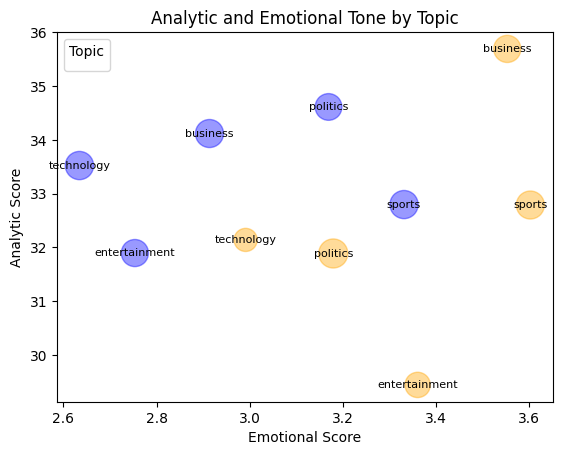

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot with bubble size based on word count and color based on source
plt.scatter(df['emotional'], df['analytic'],
            s=df['word_count'] // 1000,  # Bubble size based on word count
            c=df['source'].map({'nyt': 'blue', 'gu': 'orange'}),  # Color based on source
            alpha=0.4)

# Add labels for each data point
for x, y, topic in zip(df['emotional'], df['analytic'], df['topic']):
    plt.text(x, y, topic, fontsize=8, ha='center', va='center')

# Add axis labels and a legend
plt.xlabel('Emotional Score')
plt.ylabel('Analytic Score')
plt.title('Analytic and Emotional Tone by Topic')
plt.legend(title='Topic')

# Show the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a scatter plot with bubble size based on count and color based on country
plt.scatter(df['emotional'], df['analytic'],
            alpha=0.4,
            c=np.where(df['source'] == 'nyt', 'blue', 'orange'),
            label='nyt')
# Add labels for each data point
for i, topic in enumerate(df['topic']):
    plt.text(df['emotional'][i], df['analytic'][i], topic, fontsize=8)

# Add axis labels and a legend
plt.xlabel('Emotional')
plt.ylabel('Analytical')
plt.title('Analytic and Emotional Tone by Universities')
plt.legend()

# Show the plot
plt.show()

KeyError: ignored

Error in callback <function _draw_all_if_interactive at 0x7f38aafc2050> (for post_execute):


TypeError: ignored

TypeError: ignored

<Figure size 640x480 with 1 Axes>

In [ ]:
df['emotional'] = pd.to_numeric(df['emotional'], errors='coerce')
df['analytic'] = pd.to_numeric(df['analytic'], errors='coerce')


In [ ]:
from scipy.stats import ttest_ind
# Print the mean of each column
print("Analytic Thinking Mean of NYT articles:", pivot_df_nyt['analytic'].mean())
print("Analytic Thinking Mean of Guardian articles:", pivot_df_gu['analytic'].mean())

# Perform a t-test between the two columns
t, p = ttest_ind(pivot_df_nyt['analytic'], pivot_df_gu['analytic'])

# Print the t-statistic and p-value
print("t-statistic:", t)
print("p-value:", p)

Analytic Thinking Mean of NYT articles: 33.388170950483236
Analytic Thinking Mean of Guardian articles: 32.38875476347255
t-statistic: 0.8992559666976927
p-value: 0.3947771592228926


In [ ]:
from scipy.stats import ttest_ind
# Print the mean of each column
print("Emotional Score Mean of NYT articles:", pivot_df_nyt['emotional'].mean())
print("Emotional Score Mean of Guardian articles:", pivot_df_gu['emotional'].mean())

# Perform a t-test between the two columns
t, p = ttest_ind(pivot_df_nyt['emotional'], pivot_df_gu['emotional'])

# Print the t-statistic and p-value
print("t-statistic:", t)
print("p-value:", p)

Emotional Score Mean of NYT articles: 2.9606785943836598
Emotional Score Mean of Guardian articles: 3.3379120878475077
t-statistic: -2.1859995469759173
p-value: 0.06029587961521903


In [ ]:
for i, txt in enumerate(df['topic']):
    plt.annotate(txt, (df['emotional'][i], df['analytic'][i]), fontsize=8)
    print(i)

0
1
2
3
4


KeyError: ignored

Error in callback <function _draw_all_if_interactive at 0x7f38aafc2050> (for post_execute):


TypeError: ignored

TypeError: ignored

<Figure size 640x480 with 1 Axes>

### Compare the score between the US universities and UK universities (without topic)

In [ ]:
path = path+'liwc/'

In [ ]:
us_liwc = pd.read_csv(path+'us_liwc.csv')
uk_liwc = pd.read_csv(path+'uk_liwc.csv')

In [ ]:
us_liwc.columns

In [ ]:
uk_liwc['emotional'] = uk_liwc['posemo (Positive Emotions)']+uk_liwc['negemo (Negative Emotions)']

In [ ]:
to_merge = df.groupby('university')['doc_id'].count().to_frame(name='count')
to_merge

,count
university,
Arkansas Tech University,592
Austin Peay State University,4393
Bangor University,2170
Barry University,363
Bethel University,849
...,...
Western Carolina University,2703
Western Kentucky University,24244
Wheaton College,441


In [ ]:
liwc_data = pd.concat([us_liwc, uk_liwc], axis=0)

In [ ]:
# Merge the two dataframes by 'university' column and keep all columns
merged_df = pd.merge(liwc_data, to_merge, on='university', how='outer')

# Display the merged dataframe
merged_df

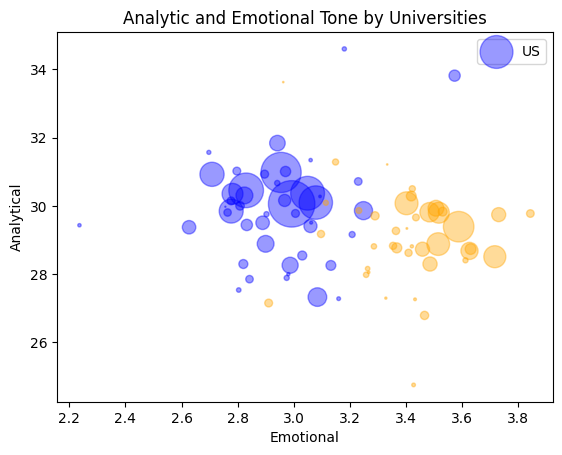

In [ ]:
import numpy as np
# Create a scatter plot with bubble size based on count and color based on country
plt.scatter(merged_df['emotional'], merged_df['analytic'],
            s=merged_df['count']/80,
            alpha=0.4,
            c=np.where(merged_df['country'] == 'US', 'blue', 'orange'),
            label='US')

# Add axis labels and a legend
plt.xlabel('Emotional')
plt.ylabel('Analytical')
plt.title('Analytic and Emotional Tone by Universities')
plt.legend()

# Show the plot
plt.show()

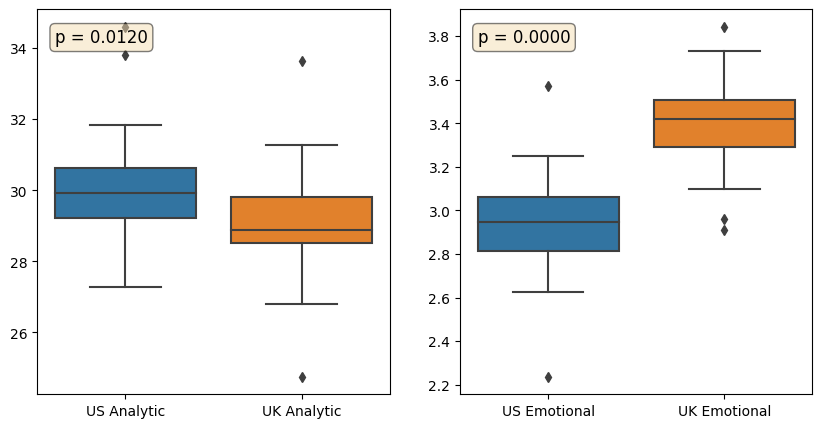

In [ ]:
# Concatenate the data into a single dataframe
liwc_data = pd.concat([us_liwc['analytic'], uk_liwc['analytic'], us_liwc['emotional'], uk_liwc['emotional']], axis=1, keys=['US Analytic', 'UK Analytic', 'US Emotional', 'UK Emotional'])

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot boxplots for "analytic" and "emotional" on their respective subplots
sns.boxplot(data=liwc_data[['US Analytic', 'UK Analytic']], ax=ax1)
sns.boxplot(data=liwc_data[['US Emotional', 'UK Emotional']], ax=ax2)

# Calculate t-test and p-value for "analytic" between US and UK
t_stat_analytic, p_val_analytic = stats.ttest_ind(us_liwc['analytic'], uk_liwc['analytic'])

# Print the p-value on the "analytic" subplot
ax1.text(0.05, 0.95, f'p = {p_val_analytic:.4f}', transform=ax1.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Calculate t-test and p-value for "emotional" between US and UK
t_stat_emotional, p_val_emotional = stats.ttest_ind(us_liwc['emotional'], uk_liwc['emotional'])

# Print the p-value on the "emotional" subplot
ax2.text(0.05, 0.95, f'p = {p_val_emotional:.4f}', transform=ax2.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Show the plot
plt.show()


In [ ]:
from scipy.stats import ttest_ind
# Print the mean of each column
print("Analytic Thinking Mean of US universities:", us_liwc['analytic'].mean())
print("Analytic Thinking Mean of UK universities:", uk_liwc['analytic'].mean())

# Perform a t-test between the two columns
t, p = ttest_ind(us_liwc['analytic'], uk_liwc['analytic'])

# Print the t-statistic and p-value
print("t-statistic:", t)
print("p-value:", p)

Analytic Thinking Mean of US universities: 29.8841038696181
Analytic Thinking Mean of UK universities: 29.085019043902193
t-statistic: 2.568238296559836
p-value: 0.011969210638573488


In [ ]:
us_topic = pd.read_csv(path+'us_topic_liwc.csv')
uk_topic = pd.read_csv(path+'uk_topic_liwc.csv')

In [ ]:
us_topic['emotional'] = us_topic['posemo (Positive Emotions)']+us_topic['negemo (Negative Emotions)']

In [ ]:
uk_topic['emotional'] = uk_topic['posemo (Positive Emotions)']+uk_topic['negemo (Negative Emotions)']

In [ ]:
us_topic['country'] = 'us'
uk_topic['country'] = 'uk'

In [ ]:
topic = pd.concat([us_topic,uk_topic],axis=0)

In [ ]:
to_merge = df.groupby(['country','macro_topic'])['doc_id'].count().to_frame(name='count')
to_merge

count
country macro_topic          
uk      arts            87524
        entertainment   38234
        opinion         22402
        other           10135
        politics        29777
        sports          22997
        studentlife     52882
us      arts            19954
        entertainment   27258
        opinion         64287
        other           93590
        politics        77300
        sports         133330
        studentlife    107859

In [ ]:
# Merge the two dataframes by 'university' column and keep all columns
merged_df = pd.merge(topic, to_merge, on=['macro_topic','country'], how='outer')
merged_df.drop('Unnamed: 0',axis=1)
merged_df

,Unnamed: 0,macro_topic,achieve (Achievement),adj (Adjectives),adverb (Adverbs),affect (Affect),affiliation (Affiliation),anger (Anger),anx (Anx),article (Articles),...,time (Time),verb (Verbs),we (We),work (Work),you (You),word_count,analytic,emotional,country,count
0,0,arts,1.050056,3.650982,2.445109,3.596787,1.939556,0.226024,0.128658,7.225728,...,3.838433,8.136358,0.496742,1.787014,0.563875,14051152,30.009355,3.563160,us,19954
1,1,entertainment,1.162989,3.252897,2.299698,2.832391,1.686720,0.121774,0.106072,7.200651,...,3.359985,8.761175,0.511897,3.251590,0.572174,19672498,30.010353,2.811011,us,27258
2,2,opinion,1.070735,3.367321,2.945463,3.626822,2.201725,0.344302,0.225615,6.362268,...,3.616402,10.140783,0.742313,2.920179,1.287522,53683418,29.954256,3.596993,us,64287
3,3,other,1.113437,3.109457,2.219855,3.338763,1.885649,0.397109,0.185342,7.564461,...,3.699881,8.597911,0.500887,3.266562,0.369470,61925995,30.025183,3.317447,us,93590
4,4,politics,1.226238,3.069514,2.137383,3.263157,1.917844,0.395831,0.220199,7.395082,...,3.327278,9.217455,0.700197,3.758059,0.300958,54071074,30.019735,3.245321,us,77300
5,5,sports,3.328870,3.414709,2.127613,3.801270,3.152589,0.227717,0.120884,8.143085,...,5.389225,8.632633,0.879500,3.401737,0.269490,92560415,30.042819,3.758162,us,133330
6,6,studentlife,1.425307,2.848287,2.118307,2.867351,2.298298,0.158070,0.120720,7.175672,...,3.582895,9.486670,0.718978,6.352287,0.359219,74773782,30.014595,2.852462,us,107859
7,0,arts,1.128391,3.822345,2.733649,4.246833,1.830436,0.388768,0.278718,7.777005,...,3.620876,8.256819,0.523744,1.868849,0.679455,63424933,30.007240,4.214508,uk,87524
8,1,entertainment,1.009117,4.091777,2.864983,3.754836,1.789047,0.239015,0.148526,7.425762,...,3.826517,8.611138,0.638756,1.412847,1.161404,27148083,29.996984,3.727254,uk,38234
9,2,opinion,0.998557,3.686238,2.782683,3.954910,2.089873,0.554606,0.311851,6.846911,...,3.228642,9.399638,0.747597,2.490754,0.617226,17478525,29.983230,3.926807,uk,22402


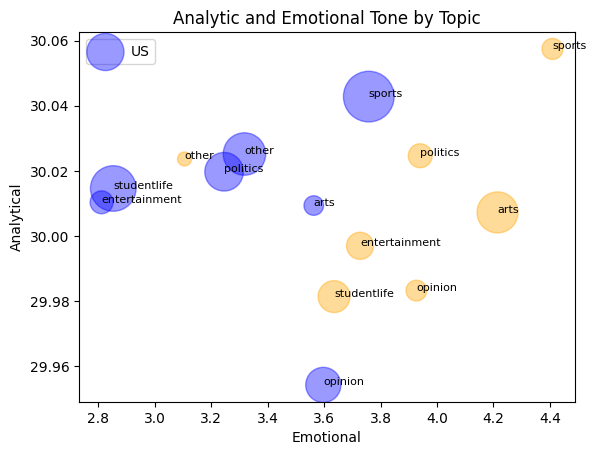

In [ ]:
# Create a scatter plot with bubble size based on count and color based on country
plt.scatter(merged_df['emotional'], merged_df['analytic'],
            s=merged_df['count']/100,
            alpha=0.4,
            c=np.where(merged_df['country'] == 'us', 'blue', 'orange'),
            label='US')

# Label the points with macro_topic
for i, txt in enumerate(merged_df['macro_topic']):
    plt.annotate(txt, (merged_df['emotional'][i], merged_df['analytic'][i]), fontsize=8)

# Add axis labels and a legend
plt.xlabel('Emotional')
plt.ylabel('Analytical')
plt.title('Analytic and Emotional Tone by Topic')
plt.legend()

# Show the plot
plt.show()


### Compare and calculate indices for macro topic

In [ ]:
uk = pd.read_csv(path+'us_final_tokens.csv',usecols=['university','tokens','topic1','topic2','topic3'])
uk

ParserError: ignored

In [ ]:
## US
uk['topic1'].unique()

array(['Announcements and Information', 'Film Reviews and Awards',
       'Sexuality and Sexual Misconduct', 'Natural Sciences',
       'Academics and Career', 'Social Commentary', 'University Sports',
       'Crime (Trial)', 'US Foreign Policy (MENA)',
       'Companies and Products', 'US Politics (Elections Coverage)',
       'Art Exhibitions', 'Music Reviews', 'University Sports (Filler)',
       'Food and Recipes', 'Public Health (COVID)',
       'Campus Life (Greek Life)', 'University Budget',
       'Crime (Community Alert)', 'Public Projects',
       'University Administration', 'Event Announcements', '(Filler)',
       'University Sprts (Filler)', 'University Sports (Track and Field)',
       'University Sports (Baseball)', 'University Sports (Basketball)',
       'University Sports (Football)', 'Filler'], dtype=object)

In [ ]:
### US
# Map these topics into macro topics
macro_topics = {
    'arts': ['Music Reviews'],
    'entertainment': ['Art Exhibitions', 'Food and Recipes'],
    'sports':['University Sports','University Sports (Filler)','University Sports (Track and Field)','University Sports (Baseball)', 'University Sports (Basketball)','University Sports (Football)'],
    'politics': ['US Foreign Policy (MENA)','US Politics (Elections Coverage)','Public Health (COVID)','Public Projects'],
    'studentlife': ['Academics and Career','Campus Life (Greek Life)','University Budget','University Administration','Event Announcements'],
    'opinion': ['Sexuality and Sexual Misconduct','Social Commentary','Companies and Products'],
    'other': ['Announcements and Information', 'Natural Sciences','Crime (Trial)','Crime (Community Alert)','(Filler)','University Sprts (Filler)','Filler']
}


In [ ]:
# Define a function to map specific topics to macro topics
def map_topics(topic):
    for macro_topic, specific_topics in macro_topics.items():
        if topic in specific_topics:
            return macro_topic
    return 'other'

# Use the map function to create a new "macro_topic" column in the dataframe
uk['macro_topic'] = uk['topic1'].map(map_topics)

In [ ]:
uk['topic1'].unique()

array(['Economy and Employment', 'Social Media and Technology Awareness',
       'Health Awareness', 'Classical Music and Dance', 'Art and History',
       'Travel', 'Identity and Discrimination', 'UK Politics',
       'Social Relations', 'Professional Sports', 'Professional Soccer',
       'War and Foreign Conflicts', 'Music Reviews',
       'University Administration', 'Fashion and Beauty',
       'Concerts and Music Festivals', 'Gaming', 'Food and Recipes',
       'Student Government', 'Film Awards',
       'Reality TV and Media Companies', 'Theater', 'Creative Writing',
       'Film Reviews', 'Student Organizations and Events',
       'Natural Sciences', 'TV Shows', 'Sports', 'Podcasts and TV',
       '(Filler)'], dtype=object)

In [ ]:
## UK
# Map these topics into macro topics
macro_topics = {
    'arts': ['Classical Music and Dance', 'Art and History',  'Theater', 'Creative Writing', 'Film Reviews','Music Reviews', 'Podcasts and TV','TV Shows', 'Reality TV and Media Companies', 'Film Awards'],
    'entertainment': ['Concerts and Music Festivals','Travel','Gaming', 'Fashion and Beauty', 'Food and Recipes'],
    'sports':['Professional Sports', 'Professional Soccer', 'Sports'],
    'politics': ['Economy and Employment',  'UK Politics', 'War and Foreign Conflicts'],
    'studentlife': [ 'Social Relations','Student Government','Student Organizations and Events','University Administration'],
    'opinion': ['Health Awareness','Identity and Discrimination', 'Social Media and Technology Awareness'],
    'other': ['Natural Sciences']
}

In [ ]:
# Define a function to map specific topics to macro topics
def map_topics(topic):
    for macro_topic, specific_topics in macro_topics.items():
        if topic in specific_topics:
            return macro_topic
    return 'other'

# Use the map function to create a new "macro_topic" column in the dataframe
uk['macro_topic'] = uk['topic1'].map(map_topics)

In [ ]:
category_counts_by_topic = {}

start_time = time.time()

for topic, topic_text in uk.groupby(['university','macro_topic'])['tokens']:
    topic_category_counts = Counter(category for row in topic_text for token in ast.literal_eval(row) for category in parse(token))
    category_counts_by_topic[topic] = topic_category_counts

all_categories_by_topic = {topic: [(category, count) for category, count in topic_category_counts.items()] for topic, topic_category_counts in category_counts_by_topic.items()}

end_time = time.time()

print(f"Total time: {end_time - start_time} seconds")

all_categories_by_topic

Total time: 1849.6936008930206 seconds


{('Arkansas Tech University ',
  'arts'): [('percept (Perceptual Processes)', 662), ('see (See)',
   163), ('adj (Adjectives)', 604), ('relativ (Relativity)',
   1947), ('affect (Affect)', 698), ('negemo (Negative Emotions)',
   170), ('anger (Anger)', 37), ('drives (Drives)', 1011), ('power (Power)',
   320), ('sad (Sad)', 51), ('function (Function Words)',
   6643), ('auxverb (Auxiliary Verbs)', 697), ('verb (Verbs)',
   1503), ('focuspresent (Present Focus)', 1162), ('article (Articles)',
   1248), ('pronoun (Pronouns)', 1465), ('ipron (Impersonal Pronouns)',
   608), ('focuspast (Past Focus)', 275), ('time (Time)',
   662), ('prep (Prepositions)', 2152), ('space (Space)',
   1043), ('ppron (Personal Pronouns)', 857), ('shehe (SheHe)',
   319), ('social (Social)', 1397), ('male (Male)', 126), ('motion (Motion)',
   273), ('affiliation (Affiliation)', 407), ('compare (Comparisons)',
   384), ('negate (Negations)', 76), ('interrog (Interrogatives)',
   172), ('posemo (Positive Emotion

In [ ]:
# Create an empty list to hold the individual dataframes for each university
dfs = []

# Iterate over each university and its corresponding category counts
for topic, category_counts in all_categories_by_topic.items():
    # Create a dataframe for the current university's category counts
    df = pd.DataFrame(category_counts, columns=['category', 'count'])
    # Add a column for the university name
    df['macro_topic'] = topic
    # Append the dataframe to the list
    dfs.append(df)

# Concatenate all the dataframes into a single dataframe
all_categories_df = pd.concat(dfs, ignore_index=True)
all_categories_df.set_index('macro_topic', inplace=True)
all_categories_df

In [ ]:
dfs = []

for university_macro, category_counts in all_categories_by_topic.items():
    university, topic = university_macro
     # Create a dataframe for the current university's category counts
    df = pd.DataFrame(category_counts, columns=['category', 'count'])
    # Add a column for the university name
    df['macro_topic'] = topic
    df['university'] = university
    dfs.append(df)

# Concatenate all the dataframes into a single dataframe
all_categories_df = pd.concat(dfs, ignore_index=True)
all_categories_df.set_index(['university','macro_topic'], inplace=True)
all_categories_df

category  count
university                macro_topic                                       
Arkansas Tech University  arts         percept (Perceptual Processes)    662
                          arts                              see (See)    163
                          arts                       adj (Adjectives)    604
                          arts                   relativ (Relativity)   1947
                          arts                        affect (Affect)    698
...                                                               ...    ...
Wright State University   studentlife           nonflu (Nonfluencies)    571
                          studentlife                   shehe (SheHe)   2058
                          studentlife                       anx (Anx)    694
                          studentlife                   swear (Swear)     24
                          studentlife           filler (Filler Words)      5

[23409 rows x 2 columns]

In [ ]:
pivot_df = all_categories_df.pivot_table(index=['university', 'macro_topic'], columns='category', values='count', aggfunc='sum')

pivot_df

category                                 achieve (Achievement)  \
university                macro_topic                            
Arkansas Tech University  arts                           186.0   
                          entertainment                  256.0   
                          opinion                        619.0   
                          other                          587.0   
                          politics                       224.0   
...                                                        ...   
Wright State University   opinion                       2292.0   
                          other                         2141.0   
                          politics                      1760.0   
                          sports                        5882.0   
                          studentlife                   8470.0   

category                                 adj (Adjectives)  adverb (Adverbs)  \
university                macro_topic                                         
Arkansas Tech University  arts                      604.0             416.0   
                          entertainment             552.0             518.0   
                          opinion                  2120.0            1844.0   
                          other                    1924.0            1480.0   
                          politics                  670.0             706.0   
...                                                   ...               ...   
Wright State University   opinion                  6963.0            5382.0   
                          other                    6201.0            4589.0   
                          politics                 4639.0            3570.0   
                          sports                   5127.0            3107.0   
                          studentlife             14059.0           10935.0   

category                                 affect (Affect)  \
university                macro_topic                      
Arkansas Tech University  arts                     698.0   
                          entertainment            584.0   
                          opinion                 2378.0   
                          other                   2256.0   
                          politics                 692.0   
...                                                  ...   
Wright State University   opinion                 7853.0   
                          other                   6826.0   
                          politics                4483.0   
                          sports                  6563.0   
                          studentlife            14924.0   

category                                 affiliation (Affiliation)  \
university                macro_topic                                
Arkansas Tech University  arts                               407.0   
                          entertainment                      318.0   
                          opinion                           1338.0   
                          other                             1036.0   
                          politics                           373.0   
...                                                            ...   
Wright State University   opinion                           4469.0   
                          other                             3721.0   
                          politics                          2509.0   
                          sports                            5558.0   
                          studentlife                      14472.0   

category                                 anger (Anger)  anx (Anx)  \
university                macro_topic                               
Arkansas Tech University  arts                    37.0       34.0   
                          entertainment            8.0       23.0   
                          opinion                165.0      213.0   
                          other                  242.0      129.0   
       

In [ ]:
word_counts_by_topic = {}

for topic, uni_text in uk.groupby(['university', 'macro_topic'])['tokens']:
    uni, mtopic = topic
    word_count = sum(len(ast.literal_eval(row)) for row in uni_text)
    word_counts_by_topic[uni, mtopic] = word_count

In [ ]:
uk.groupby(['university', 'macro_topic'])['tokens']

In [ ]:
word_counts = [word_counts_by_topic.get(topic, 0) for topic in pivot_df['macro_topic']]
pivot_df['word_count'] = word_counts
cols_to_divide = pivot_df.columns[1:-1]  # select columns 2 to second last
pivot_df[cols_to_divide] = pivot_df[cols_to_divide].div(pivot_df['word_count'], axis=0)
pivot_df

KeyError: ignored

In [ ]:
# Group the dataframe by university and category, and sum the counts for each group
grouped_df = all_categories_df.groupby(['university','category']).sum()

# Reset the index of the grouped dataframe
grouped_df = grouped_df.reset_index()

# Use pivot_table to create a new dataframe with category columns and count values
pivot_df = pd.pivot_table(grouped_df, index='university', columns='category', values='count')

# Reset the index and column names of the new dataframe
pivot_df = pivot_df.reset_index()
pivot_df.columns.name = None

# Print the resulting dataframe
pivot_df

,university,achieve (Achievement),adj (Adjectives),adverb (Adverbs),affect (Affect),affiliation (Affiliation),anger (Anger),anx (Anx),article (Articles),assent (Assent),...,social (Social),space (Space),swear (Swear),tentat (Tentative),they (They),time (Time),verb (Verbs),we (We),work (Work),you (You)
0,Arkansas Tech University,5021.0,9454.0,7541.0,10759.0,7050.0,752.0,567.0,21162.0,135.0,...,21777.0,17195.0,46.0,4034.0,2467.0,12135.0,30039.0,2166.0,10505.0,2133.0
1,Austin Peay State University,48188.0,85701.0,59002.0,89835.0,57718.0,8918.0,4198.0,195237.0,817.0,...,179894.0,165181.0,410.0,29550.0,22325.0,115505.0,238864.0,14702.0,103670.0,12874.0
2,Barry University,3844.0,8622.0,5785.0,9540.0,5171.0,635.0,570.0,17417.0,42.0,...,19196.0,14847.0,11.0,3113.0,2279.0,10343.0,23408.0,1102.0,13269.0,1961.0
3,Bethel University,9764.0,22606.0,18073.0,23322.0,20098.0,1670.0,1184.0,46711.0,286.0,...,60993.0,43843.0,162.0,8026.0,5737.0,28556.0,67319.0,4863.0,28086.0,5209.0
4,Boston University,615500.0,1113241.0,800670.0,1209352.0,804539.0,111040.0,61092.0,2604949.0,10272.0,...,2552550.0,2075801.0,7339.0,415304.0,294178.0,1363928.0,3156823.0,262199.0,1365279.0,140719.0
5,Capital University,22021.0,50936.0,40610.0,50949.0,32671.0,3739.0,2633.0,111025.0,547.0,...,105028.0,88332.0,400.0,22166.0,13152.0,61903.0,149688.0,8966.0,59237.0,10270.0
6,Cerritos College,135957.0,230752.0,197409.0,268266.0,187293.0,22372.0,11871.0,556865.0,5791.0,...,586372.0,432441.0,2383.0,94853.0,73270.0,290459.0,772015.0,55162.0,320918.0,46866.0
7,Columbia College,76945.0,176766.0,129604.0,179894.0,123300.0,15128.0,9120.0,413238.0,1903.0,...,439129.0,329511.0,1062.0,68579.0,47763.0,206139.0,550477.0,37672.0,257550.0,27788.0
8,Contra Costa College,31866.0,52960.0,38318.0,58115.0,45245.0,4842.0,2998.0,141031.0,358.0,...,143924.0,109652.0,370.0,19669.0,15571.0,69218.0,177969.0,11251.0,93199.0,4400.0
9,Cornell University,680127.0,1241356.0,843787.0,1258104.0,856970.0,110801.0,64701.0,2744605.0,14444.0,...,2419799.0,2164207.0,13327.0,442080.0,242172.0,1507608.0,3058214.0,281820.0,1366013.0,173845.0


In [ ]:
# Group the dataframe by university and category, and sum the counts for each group
grouped_df = all_categories_df.groupby(['macro_topic', 'category']).sum()

# Reset the index of the grouped dataframe
grouped_df = grouped_df.reset_index()

# Use pivot_table to create a new dataframe with category columns and count values
pivot_df = pd.pivot_table(grouped_df, index='macro_topic', columns='category', values='count')

# Reset the index and column names of the new dataframe
pivot_df = pivot_df.reset_index()
pivot_df.columns.name = None

# Print the resulting dataframe
pivot_df

,macro_topic,achieve (Achievement),adj (Adjectives),adverb (Adverbs),affect (Affect),affiliation (Affiliation),anger (Anger),anx (Anx),article (Articles),assent (Assent),...,social (Social),space (Space),swear (Swear),tentat (Tentative),they (They),time (Time),verb (Verbs),we (We),work (Work),you (You)
0,arts,715681,2424320,1733815,2693551,1160953,246576,176777,4932560,32737,...,3940054,3561168,31942,886561,415755,2296538,5236882,332184,1185316,430944
1,entertainment,273956,1110839,777788,1019366,485692,64888,40322,2015952,19577,...,1644831,1660662,9817,404911,226830,1038826,2337759,173410,383561,315299
2,opinion,174533,644300,486372,691260,365279,96937,54507,1196739,6352,...,1318614,973891,5543,271890,165482,564319,1642918,130669,435347,107882
3,other,82986,247888,163996,214993,119354,18219,14544,503785,1741,...,330950,446357,961,92196,47693,221935,572218,55163,210309,24422
4,politics,280735,808650,553439,926598,452396,144193,70032,1849776,6970,...,1419084,1493847,3328,308897,187141,805913,2055583,167333,794920,66520
5,sports,545446,701219,424762,788030,443826,63572,37777,1519621,4681,...,1020938,1321655,2021,192634,175776,894098,1478565,73807,435049,41343
6,studentlife,509509,1341303,1063786,1404678,873089,99333,91057,2658049,16037,...,2716399,2226937,7645,564012,331770,1467143,3816541,319654,1580895,354827


In [ ]:
word_counts_by_topic = {}

for topic, uni_text in uk.groupby('macro_topic')['tokens']:
    word_count = sum(len(ast.literal_eval(row)) for row in uni_text)
    word_counts_by_topic[topic] = word_count

word_counts = [word_counts_by_topic.get(topic, 0) for topic in pivot_df['macro_topic']]
pivot_df['word_count'] = word_counts
cols_to_divide = pivot_df.columns[1:-1]  # select columns 2 to second last
pivot_df[cols_to_divide] = pivot_df[cols_to_divide].div(pivot_df['word_count'], axis=0)
pivot_df

,macro_topic,achieve (Achievement),adj (Adjectives),adverb (Adverbs),affect (Affect),affiliation (Affiliation),anger (Anger),anx (Anx),article (Articles),assent (Assent),...,space (Space),swear (Swear),tentat (Tentative),they (They),time (Time),verb (Verbs),we (We),work (Work),you (You),word_count
0,arts,0.011284,0.038223,0.027336,0.042468,0.018304,0.003888,0.002787,0.077770,0.000516,...,0.056148,0.000504,0.013978,0.006555,0.036209,0.082568,0.005237,0.018688,0.006795,63424933
1,entertainment,0.010091,0.040918,0.028650,0.037548,0.017890,0.002390,0.001485,0.074258,0.000721,...,0.061171,0.000362,0.014915,0.008355,0.038265,0.086111,0.006388,0.014128,0.011614,27148083
2,opinion,0.009986,0.036862,0.027827,0.039549,0.020899,0.005546,0.003119,0.068469,0.000363,...,0.055719,0.000317,0.015556,0.009468,0.032286,0.093996,0.007476,0.024908,0.006172,17478525
3,other,0.012048,0.035989,0.023809,0.031213,0.017328,0.002645,0.002112,0.073140,0.000253,...,0.064803,0.000140,0.013385,0.006924,0.032221,0.083076,0.008009,0.030533,0.003546,6887914
4,politics,0.011997,0.034556,0.023650,0.039597,0.019332,0.006162,0.002993,0.079047,0.000298,...,0.063837,0.000142,0.013200,0.007997,0.034439,0.087842,0.007151,0.033970,0.002843,23400961
5,sports,0.030731,0.039507,0.023931,0.044398,0.025005,0.003582,0.002128,0.085616,0.000264,...,0.074462,0.000114,0.010853,0.009903,0.050374,0.083303,0.004158,0.024511,0.002329,17749303
6,studentlife,0.013271,0.034938,0.027709,0.036588,0.022742,0.002587,0.002372,0.069236,0.000418,...,0.058006,0.000199,0.014691,0.008642,0.038215,0.099411,0.008326,0.041178,0.009242,38391380


In [ ]:
pivot_df['analytic'] = 30 + pivot_df['article (Articles)'] + pivot_df['prep (Prepositions)']\
                        - pivot_df['ppron (Personal Pronouns)'] - pivot_df['ipron (Impersonal Pronouns)'] \
                        - pivot_df['auxverb (Auxiliary Verbs)'] - pivot_df['conj (Conjunctions)']\
                        - pivot_df['adverb (Adverbs)'] - pivot_df['negate (Negations)']

In [ ]:
newpath = path+'liwc score/'
pivot_df[cols_to_divide] = pivot_df[cols_to_divide] * 100
pivot_df.to_csv(newpath+'uk_topic_liwc.csv')

### Compare and calculate indices for micro topic

In [ ]:
category_counts_by_topic = {}

start_time = time.time()

for topic, topic_text in uk.groupby('topic1')['tokens']:
    topic_category_counts = Counter(category for row in topic_text for token in ast.literal_eval(row) for category in parse(token))
    category_counts_by_topic[topic] = topic_category_counts

all_categories_by_topic = {topic: [(category, count) for category, count in topic_category_counts.items()] for topic, topic_category_counts in category_counts_by_topic.items()}

end_time = time.time()

print(f"Total time: {end_time - start_time} seconds")

all_categories_by_topic

Total time: 1663.6375529766083 seconds


{'(Filler)': [('relativ (Relativity)', 534401),
  ('time (Time)', 200095),
  ('number (Numbers)', 38894),
  ('affect (Affect)', 137602),
  ('posemo (Positive Emotions)', 99089),
  ('bio (Biological Processes)', 47814),
  ('sexual (Sexual)', 4185),
  ('function (Function Words)', 1494208),
  ('conj (Conjunctions)', 180818),
  ('percept (Perceptual Processes)', 96902),
  ('see (See)', 44748),
  ('work (Work)', 211692),
  ('money (Money)', 23423),
  ('prep (Prepositions)', 544889),
  ('drives (Drives)', 301782),
  ('power (Power)', 124495),
  ('motion (Motion)', 66535),
  ('body (Body)', 10196),
  ('space (Space)', 273056),
  ('social (Social)', 297875),
  ('focuspresent (Present Focus)', 266029),
  ('adverb (Adverbs)', 93727),
  ('interrog (Interrogatives)', 35851),
  ('cogproc (Cognitive Processes)', 230069),
  ('cause (Causal)', 35136),
  ('verb (Verbs)', 359067),
  ('insight (Insight)', 58263),
  ('pronoun (Pronouns)', 240373),
  ('ppron (Personal Pronouns)', 134776),
  ('they (They)'

In [ ]:
# Create an empty list to hold the individual dataframes for each university
dfs = []

# Iterate over each university and its corresponding category counts
for topic, category_counts in all_categories_by_topic.items():
    # Create a dataframe for the current university's category counts
    df = pd.DataFrame(category_counts, columns=['category', 'count'])
    # Add a column for the university name
    df['topic'] = topic
    # Append the dataframe to the list
    dfs.append(df)

# Concatenate all the dataframes into a single dataframe
all_categories_df = pd.concat(dfs, ignore_index=True)
all_categories_df.set_index('topic', inplace=True)
all_categories_df

,category,count
topic,,
(Filler),relativ (Relativity),534401
(Filler),time (Time),200095
(Filler),number (Numbers),38894
(Filler),affect (Affect),137602
(Filler),posemo (Positive Emotions),99089
...,...,...
University Sprts (Filler),ingest (Ingest),2936
University Sprts (Filler),death (Death),2317
University Sprts (Filler),sexual (Sexual),680


In [ ]:
# Group the dataframe by university and category, and sum the counts for each group
grouped_df = all_categories_df.groupby(['topic', 'category']).sum()

# Reset the index of the grouped dataframe
grouped_df = grouped_df.reset_index()

# Use pivot_table to create a new dataframe with category columns and count values
pivot_df = pd.pivot_table(grouped_df, index='topic', columns='category', values='count')

# Reset the index and column names of the new dataframe
pivot_df = pivot_df.reset_index()
pivot_df.columns.name = None

# Print the resulting dataframe
pivot_df

,topic,achieve (Achievement),adj (Adjectives),adverb (Adverbs),affect (Affect),affiliation (Affiliation),anger (Anger),anx (Anx),article (Articles),assent (Assent),...,social (Social),space (Space),swear (Swear),tentat (Tentative),they (They),time (Time),verb (Verbs),we (We),work (Work),you (You)
0,(Filler),64999,134506,93727,137602,103588,12180,5161,323599,1575,...,297875,273056,1106,46698,23596,200095,359067,27621,211692,19282
1,Academics and Career,419510,816831,647793,774843,553126,26447,39995,1812670,5841,...,2083165,1537214,2027,365985,273869,967783,2742191,175797,2054167,140393
2,Announcements and Information,113555,345614,240983,296186,188622,14333,10797,767755,2863,...,660013,763442,1257,127544,75069,455498,997341,63241,314518,44879
3,Art Exhibitions,145473,326747,252956,309842,214214,13522,9941,851710,2940,...,814428,679489,1269,119761,82400,394469,1001089,54957,438825,43803
4,Campus Life (Greek Life),135074,250827,196276,273246,293059,13454,8286,665077,2251,...,749203,522300,846,92850,86340,362845,857131,69317,391342,29575
5,Companies and Products,129630,320104,245794,316913,147424,13868,14296,629969,2996,...,645062,514877,1174,169183,78057,304078,952896,46445,489366,148122
6,Crime (Community Alert),24791,92319,86048,119646,50512,27558,8688,470422,486,...,344100,419985,440,39179,23586,163227,367279,7212,188860,4939
7,Crime (Trial),91053,297024,226298,364970,201677,86850,24317,829862,1768,...,832365,630139,1313,139004,83613,375761,1028957,62660,452185,29978
8,Event Announcements,95062,215026,145745,237794,176129,9421,7138,562577,1928,...,535902,418851,961,67539,50683,308548,626348,41987,329947,25673
9,Filler,21056,46221,20320,47761,45686,2592,1111,82958,228,...,95463,118119,129,9521,6845,63085,102011,5890,45481,3430


In [ ]:
word_counts_by_topic = {}

for topic, uni_text in uk.groupby('topic1')['tokens']:
    word_count = sum(len(ast.literal_eval(row)) for row in uni_text)
    word_counts_by_topic[topic] = word_count

word_counts = [word_counts_by_topic.get(topic, 0) for topic in pivot_df['topic']]
pivot_df['word_count'] = word_counts
cols_to_divide = pivot_df.columns[1:-1]  # select columns 2 to second last
pivot_df[cols_to_divide] = pivot_df[cols_to_divide].div(pivot_df['word_count'], axis=0)
pivot_df

,topic,achieve (Achievement),adj (Adjectives),adverb (Adverbs),affect (Affect),affiliation (Affiliation),anger (Anger),anx (Anx),article (Articles),assent (Assent),...,space (Space),swear (Swear),tentat (Tentative),they (They),time (Time),verb (Verbs),we (We),work (Work),you (You),word_count
0,(Filler),0.013528,0.027994,0.019507,0.028638,0.021559,0.002535,0.001074,0.067348,0.000328,...,0.056829,0.000230,0.009719,0.004911,0.041644,0.074730,0.005749,0.044058,0.004013,4804860
1,Academics and Career,0.015532,0.030243,0.023984,0.028688,0.020479,0.000979,0.001481,0.067113,0.000216,...,0.056914,0.000075,0.013550,0.010140,0.035832,0.101528,0.006509,0.076054,0.005198,27009235
2,Announcements and Information,0.010719,0.032623,0.022747,0.027958,0.017805,0.001353,0.001019,0.072470,0.000270,...,0.072063,0.000119,0.012039,0.007086,0.042996,0.094142,0.005969,0.029688,0.004236,10594035
3,Art Exhibitions,0.012724,0.028579,0.022125,0.027100,0.018736,0.001183,0.000869,0.074495,0.000257,...,0.059432,0.000111,0.010475,0.007207,0.034502,0.087560,0.004807,0.038382,0.003831,11433116
4,Campus Life (Greek Life),0.014547,0.027013,0.021138,0.029428,0.031562,0.001449,0.000892,0.071627,0.000242,...,0.056250,0.000091,0.010000,0.009299,0.039077,0.092310,0.007465,0.042146,0.003185,9285306
5,Companies and Products,0.013617,0.033625,0.025820,0.033290,0.015486,0.001457,0.001502,0.066175,0.000315,...,0.054085,0.000123,0.017772,0.008200,0.031942,0.100097,0.004879,0.051406,0.015560,9519690
6,Crime (Community Alert),0.005104,0.019007,0.017716,0.024634,0.010400,0.005674,0.001789,0.096855,0.000100,...,0.086470,0.000091,0.008067,0.004856,0.033607,0.075619,0.001485,0.038884,0.001017,4856978
7,Crime (Trial),0.008237,0.026868,0.020471,0.033015,0.018243,0.007856,0.002200,0.075068,0.000160,...,0.057002,0.000119,0.012574,0.007564,0.033991,0.093078,0.005668,0.040904,0.002712,11054760
8,Event Announcements,0.012521,0.028322,0.019197,0.031321,0.023199,0.001241,0.000940,0.074100,0.000254,...,0.055169,0.000127,0.008896,0.006676,0.040640,0.082499,0.005530,0.043459,0.003382,7592149
9,Filler,0.015249,0.033473,0.014716,0.034588,0.033086,0.001877,0.000805,0.060078,0.000165,...,0.085542,0.000093,0.006895,0.004957,0.045686,0.073876,0.004266,0.032937,0.002484,1380837


In [ ]:
pivot_df['analytic'] = 30 + pivot_df['article (Articles)'] + pivot_df['prep (Prepositions)']\
                        - pivot_df['ppron (Personal Pronouns)'] - pivot_df['ipron (Impersonal Pronouns)'] \
                        - pivot_df['auxverb (Auxiliary Verbs)'] - pivot_df['conj (Conjunctions)']\
                        - pivot_df['adverb (Adverbs)'] - pivot_df['negate (Negations)']

In [ ]:
newpath = path+'liwc score/'
pivot_df[cols_to_divide] = pivot_df[cols_to_divide] * 100
pivot_df.to_csv(newpath+'us_small_topic_liwc.csv')

Concreteness and abstractness

score for each article
expecting a normal distribution for the US
expecting a more extreme sides for the UK

Stylistic difference for LIWC, abstractness

Content difference using topic modelling

## BERT for word embeddings to calculate coherence

In [ ]:
!pip install transformers
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaModel
from sklearn.metrics.pairwise import cosine_similarity

# Load the pre-trained RoBERTa model and tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base', output_hidden_states=True)

def split_sentences(text):
    # Split the text into sentences based on the period (.)
    sentences = text.split('.')
    # Remove any empty strings or strings with only white space characters
    sentences = [s.strip() for s in sentences if s.strip()]
    return sentences

def get_sentence_embeddings(sentences):
    # Tokenize sentences and convert to input IDs
    input_ids = []
    attention_masks = []
    for sent in sentences:
        encoded_sent = tokenizer.encode_plus(
            sent,
            add_special_tokens=True,
            max_length=512,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        input_ids.append(encoded_sent['input_ids'])
        attention_masks.append(encoded_sent['attention_mask'])

    # Convert input IDs and attention masks to tensors
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    # Get RoBERTa model output for the sentences
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_masks)

    # Extract the last hidden state of the last layer to get sentence embeddings
    last_hidden_state = outputs.last_hidden_state
    sentence_embeddings = last_hidden_state[:, 0, :].numpy()

    return sentence_embeddings

def pairwise_cosine_similarity(embedding_list):
    similarity_list = []
    for i in range(len(embedding_list)-1):
        pair_similarity = cosine_similarity([embedding_list[i]], [embedding_list[i+1]])[0][0]
        similarity_list.append(pair_similarity)
    return similarity_list

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
sentences = split_sentences(us['text'][0])
embeddings = get_sentence_embeddings(sentences)
similarity = pairwise_cosine_similarity(embeddings)
similarity

[0.99699616,
 0.9985864,
 0.9986711,
 0.9980136,
 0.99785525,
 0.9973324,
 0.9984262,
 0.99808043,
 0.99811435,
 0.9982217,
 0.99631864,
 0.9958998]

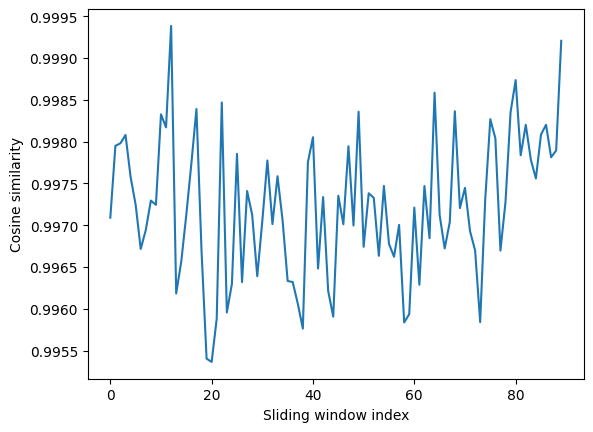

In [ ]:
import matplotlib.pyplot as plt

# create x-axis values as a range of indices for the similarity_list
x = range(len(similarity))

# create a line graph of the similarity_list
plt.plot(x, similarity)

# add title and axis labels
plt.xlabel('Sliding window index')
plt.ylabel('Cosine similarity')

# display the plot
plt.show()

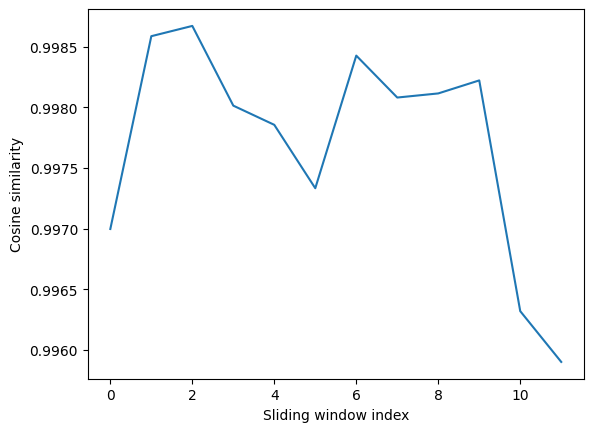

In [ ]:
import matplotlib.pyplot as plt

# create x-axis values as a range of indices for the similarity_list
x = range(len(similarity))

# create a line graph of the similarity_list
plt.plot(x, similarity)

# add title and axis labels
plt.xlabel('Sliding window index')
plt.ylabel('Cosine similarity')

# display the plot
plt.show()


In [ ]:
sentences

['Feb 281 min readBARRY UNVEILS ELECTRIC CAR CHARGERSUpdated: Mar 3By Anna GalaktionovPhoto Credit to Leonardo TrianaHave you noticed the ever-increasing number of Teslas cruising on Miami roads? What about those other electric cars parked in Barry’s own lots? Maybe you yourself are an electric car owner or are considering becoming one',
 'With the popularity of electric cars growing, Barry University is currently installing four electric vehicle chargers that will be available for students, faculty, staff, and visitors',
 'Photo Credit to Leonardo TrianaTwo of the chargers are located in parking spaces near Kelly House and the other two are in the south Landon Student Union parking lot',
 'According to Kenny Ma, Barry director of communications, the charging stations will be operational late this spring semester',
 'Julienn Cedeno, a senior applied sport & exercise performance psychology major, is one of many students who can’t wait for the stations to open',
 '“They are super conveni

## Concreteness and abstractness score of each article

In [ ]:
import nltk
from nltk.corpus import wordnet as wn
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def calculate_branching_factor(word_list):
    total_branching_factor = 0
    total_words = 0
    for word in word_list:
        synsets = wn.synsets(word)
        if synsets:
            descendant_count = 0
            for synset in synsets:
                descendant_count += len(synset.hyponyms()) + 1
            branching_factor = descendant_count / len(synsets)
            total_branching_factor += branching_factor
            total_words += 1
    if total_words > 0:
        return total_branching_factor / total_words
    else:
        return None

In [ ]:
uk['branching_factor'] = uk['tokens'].apply(ast.literal_eval).apply(calculate_branching_factor)

In [ ]:
import pandas as pd
import ast

read_file = path+'uk_final_tokens.csv'  # input CSV file
write_file = path+'uk_final_tokens_with_branching_factor.csv'  # output CSV file
chunk_size = 10000  # number of rows to process in each chunk

# Loop through each chunk of rows and add the new column value
for chunk in pd.read_csv(read_file, chunksize=chunk_size):
    # Apply ast.literal_eval to each row of the 'tokens' column
    tokens_lists = chunk['tokens'].apply(ast.literal_eval)

    # Apply calculate_branching_factor to each list of tokens
    branching_factor = tokens_lists.apply(calculate_branching_factor)

    # Add the new column to the chunk
    chunk['branching_factor'] = branching_factor

    # Write the chunk to the output CSV file
    chunk.to_csv(write_file, index=False, header=False, mode='a')

In [ ]:
df_us = pd.read_csv(path+'us_final_tokens_with_branching_factor.csv', usecols= ['doc_id','date','university','topic1','branching_factor'])
df_uk = pd.read_csv(path+'uk_final_tokens_with_branching_factor.csv', usecols= ['doc_id','date','university','topic1','branching_factor'])
df_us

,date,university,doc_id,topic1,branching_factor
0,Feb 27,Barry University,1,Film Reviews and Awards,3.236452
1,Feb 28,Barry University,2,Sexuality and Sexual Misconduct,5.226308
2,Feb 28,Barry University,3,Natural Sciences,5.365587
3,Feb 27,Barry University,4,Academics and Career,4.096614
4,Feb 28,Barry University,5,Film Reviews and Awards,3.248459
...,...,...,...,...,...
523573,"October 15, 2018",Wright State University,523574,Campus Life (Greek Life),4.919165
523574,"October 12, 2018",Wright State University,523575,Social Commentary,3.101133
523575,"October 15, 2018",Wright State University,523576,Social Commentary,5.867242
523576,"October 11, 2018",Wright State University,523577,Film Reviews and Awards,3.825376


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

sns.histplot(df_uk['doc_id'], x='branching_factor', bins=20, ax=ax2)
ax2.set_xlabel('Branching Factor Score', fontsize=12)
ax2.set_ylabel('Number of Articles', fontsize=12)
ax2.set_title('Distribution of Articles by Branching Factor Score - UK', fontsize=14)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

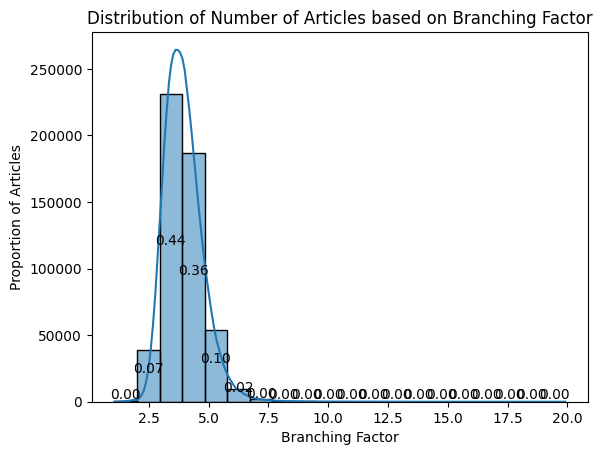

In [ ]:
import seaborn as sns

# Calculate the total number of articles in the dataset
total_articles = df_us['doc_id'].nunique()

# Create a histogram plot using Seaborn with normalized y-axis
sns.histplot(data=df_us, x="branching_factor", bins=20, multiple="stack", kde=True)
plt.xlabel('Branching Factor')
plt.ylabel('Proportion of Articles')
plt.title('Distribution of Number of Articles based on Branching Factor')

# Normalize the y-axis by dividing the y-values by the total number of articles
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width() / 2, height / 2, '{0:.2f}'.format(height / total_articles), ha='center', va='bottom')

plt.show()

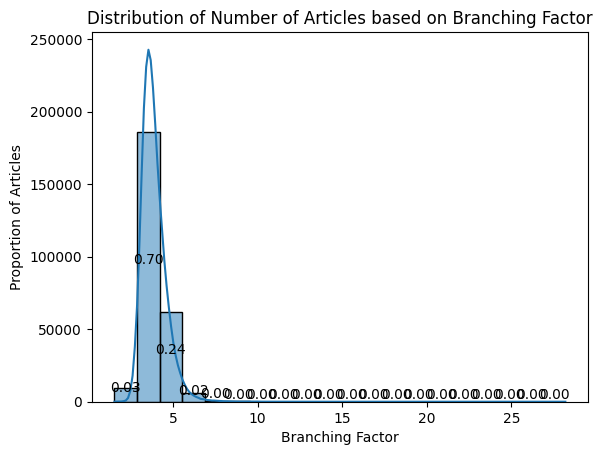

In [ ]:
import seaborn as sns

# Calculate the total number of articles in the dataset
total_articles = df_uk['doc_id'].nunique()

# Create a histogram plot using Seaborn with normalized y-axis
sns.histplot(data=df_uk, x="branching_factor", bins=20, multiple="stack", kde=True)
plt.xlabel('Branching Factor')
plt.ylabel('Proportion of Articles')
plt.title('Distribution of Number of Articles based on Branching Factor')

# Normalize the y-axis by dividing the y-values by the total number of articles
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width() / 2, height / 2, '{0:.2f}'.format(height / total_articles), ha='center', va='bottom')

plt.show()

In [ ]:
### US
# Map these topics into macro topics
macro_topics = {
    'arts': ['Music Reviews'],
    'entertainment': ['Art Exhibitions', 'Food and Recipes'],
    'sports':['University Sports','University Sports (Filler)','University Sports (Track and Field)','University Sports (Baseball)', 'University Sports (Basketball)','University Sports (Football)'],
    'politics': ['US Foreign Policy (MENA)','US Politics (Elections Coverage)','Public Health (COVID)','Public Projects'],
    'studentlife': ['Academics and Career','Campus Life (Greek Life)','University Budget','University Administration','Event Announcements'],
    'opinion': ['Sexuality and Sexual Misconduct','Social Commentary','Companies and Products'],
    'other': ['Announcements and Information', 'Natural Sciences','Crime (Trial)','Crime (Community Alert)','(Filler)','University Sprts (Filler)','Filler']
}
# Define a function to map specific topics to macro topics
def map_topics(topic):
    for macro_topic, specific_topics in macro_topics.items():
        if topic in specific_topics:
            return macro_topic
    return 'other'

# Use the map function to create a new "macro_topic" column in the dataframe
df_us['macro_topic'] = df_us['topic1'].map(map_topics)

In [ ]:
## UK
# Map these topics into macro topics
macro_topics = {
    'arts': ['Classical Music and Dance', 'Art and History',  'Theater', 'Creative Writing', 'Film Reviews','Music Reviews', 'Podcasts and TV','TV Shows', 'Reality TV and Media Companies', 'Film Awards'],
    'entertainment': ['Concerts and Music Festivals','Travel','Gaming', 'Fashion and Beauty', 'Food and Recipes'],
    'sports':['Professional Sports', 'Professional Soccer', 'Sports'],
    'politics': ['Economy and Employment',  'UK Politics', 'War and Foreign Conflicts'],
    'studentlife': [ 'Social Relations','Student Government','Student Organizations and Events','University Administration'],
    'opinion': ['Health Awareness','Identity and Discrimination', 'Social Media and Technology Awareness'],
    'other': ['Natural Sciences']
}
df_uk['macro_topic'] = df_uk['topic1'].map(map_topics)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# create scaler object and fit to branching_factor
scaler = MinMaxScaler(feature_range=(0, 5))
df['scaled_branching_factor'] = scaler.fit_transform(df[['branching_factor']])
df_us['scaled_branching_factor'] = scaler.fit_transform(df_us[['branching_factor']])
df_uk['scaled_branching_factor'] = scaler.fit_transform(df_uk[['branching_factor']])

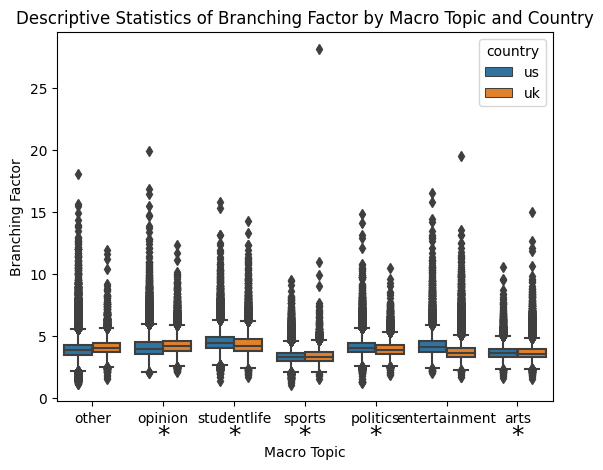

In [ ]:
from scipy.stats import ttest_ind

stats = df.groupby(['macro_topic', 'country'])['branching_factor'].describe()

# Create a box plot using Seaborn
ax = sns.boxplot(data=df, x='macro_topic', y='branching_factor', hue='country')
plt.xlabel('Macro Topic', labelpad=15)
plt.ylabel('Branching Factor')
plt.title('Descriptive Statistics of Branching Factor by Macro Topic and Country')

# Perform t-tests and add asterisks to indicate statistical significance
for i, topic in enumerate(stats.index.levels[0]):
    us_data = df_us.loc[df_us['macro_topic'] == topic, 'branching_factor']
    uk_data = df_uk.loc[df_uk['macro_topic'] == topic, 'branching_factor']
    t_stat, p_val = ttest_ind(us_data, uk_data, equal_var=False)
    if p_val < 0.05:
        ax.text(i, -4, "*", fontsize=18, ha="center", va="bottom")

plt.show()

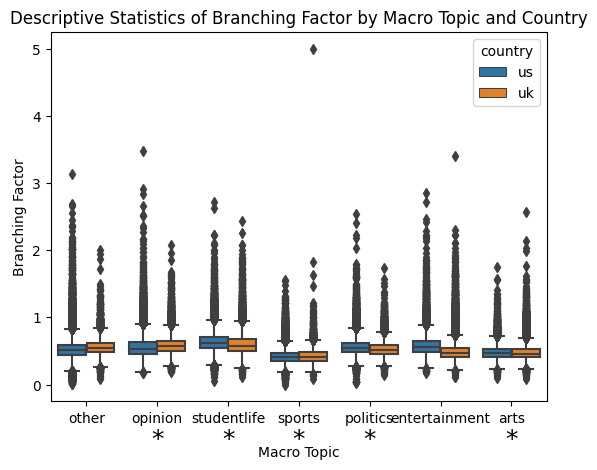

In [ ]:
from scipy.stats import ttest_ind

stats = df.groupby(['macro_topic', 'country'])['scaled_branching_factor'].describe()

# Create a box plot using Seaborn
ax = sns.boxplot(data=df, x='macro_topic', y='scaled_branching_factor', hue='country')
plt.xlabel('Macro Topic', labelpad=15)
plt.ylabel('Branching Factor')
plt.title('Descriptive Statistics of Branching Factor by Macro Topic and Country')

# Perform t-tests and add asterisks to indicate statistical significance
for i, topic in enumerate(stats.index.levels[0]):
    us_data = df_us.loc[df_us['macro_topic'] == topic, 'scaled_branching_factor']
    uk_data = df_uk.loc[df_uk['macro_topic'] == topic, 'scaled_branching_factor']
    t_stat, p_val = ttest_ind(us_data, uk_data, equal_var=False)
    if p_val < 0.05:
        ax.text(i, -1, "*", fontsize=18, ha="center", va="bottom")

plt.show()

In [ ]:
df['year'] = pd.to_datetime(df['date'], errors='coerce').dt.year

<ipython-input-63-e771a54ed424>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df[df['year']>=2000].groupby(['country', 'year']).mean().reset_index()


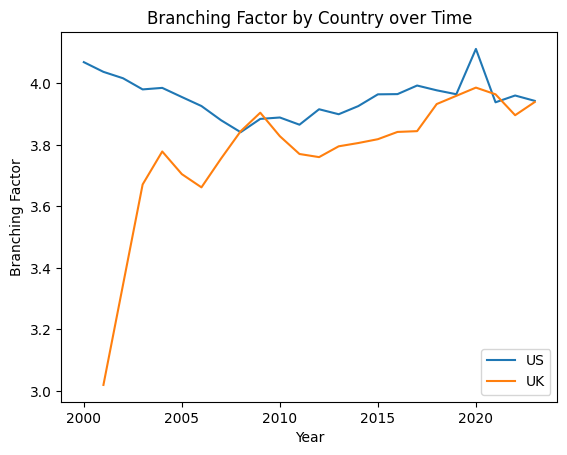

In [ ]:
import matplotlib.pyplot as plt

# Group data by country and year
df_grouped = df[df['year']>=2000].groupby(['country', 'year']).mean().reset_index()

# Separate data for each country
us_data = df_grouped[df_grouped['country'] == 'us']
uk_data = df_grouped[df_grouped['country'] == 'uk']

# Plot data for each country
plt.plot(us_data['year'], us_data['branching_factor'], label='US')
plt.plot(uk_data['year'], uk_data['branching_factor'], label='UK')
plt.title('Branching Factor by Country over Time')

# Add axis labels and legend
plt.xlabel('Year')
plt.ylabel('Branching Factor')
plt.legend()

# Show the plot
plt.show()